# Setup

In [1]:
import re
import os
import sys
import time
import pickle 
import requests
import numpy as np
import pandas as pd
from ipywidgets import widgets

In [ ]:
# Required packages
%pip install ggplot
%pip install chart_studio
%pip install shap
%pip install plotnine
%pip install pyod
%pip install lifelines
%pip install seaborn
%pip install chart_studio.plotly
%pip install plotnine
%pip install shap
%pip install xgboost
%pip install imblearn

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
MAIN_DIR = 'D:/Upload'
DATASETS = ['GSE11121',
            'GSE18864',
            'GSE20711',
            'GSE23593',
            'GSE27120',
            'GSE32646',
            'GSE36771', 
            'GSE42568', 
            'GSE50948', 
            'GSE5460', 
            'GSE11001',
            'GSE87007',
            'GSE88770',
            'GSE7390', 
            'GSE78958',
            'GSE45255',
            'GSE61304',
            'GSE63471',
            'GSE21653',
            'GSE26639',
            'GSE17907',
            'GSE10810',
            'GSE25066',
            'GSE47109',
            'GSE95700',
            'GSE5327',
            'GSE48390',
            'GSE58984',
            'GSE103091',
            'GSE45827',
            'GSE65194', 
            'GSE1456',
            'GSE102484']

# Data Import and Cleaning

In [4]:
annot = pd.read_csv(f'{MAIN_DIR}/probe2gene.csv')
probe_to_symbol = pd.Series(annot['genes'].values, index=annot['probes']).to_dict()

In [5]:
annot

,probes,genes
0,1007_s_at,DDR1
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
79407,AFFX-HUMGAPDH/M33197_M_at,GAPDH
79408,AFFX-HUMISGF3A/M97935_3_at,STAT1
79409,AFFX-HUMISGF3A/M97935_5_at,STAT1
79410,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [6]:
df = pd.read_csv(f'{MAIN_DIR}/analysed_datasets/merged/merged_COMBAT_rma_new.matrix.csv', index_col=0).transpose()    
df.shape

(5335, 22277)

In [7]:
df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM282373,10.395821,6.510217,5.991250,7.691322,3.593455,6.566260,7.662514,4.609439,5.296321,4.120242,...,11.22750,10.82161,12.81802,12.70465,6.861664,5.330491,5.668629,2.892264,3.645492,3.323040
GSM282374,11.529686,6.644342,6.078726,7.575042,3.108789,7.353092,6.648157,4.497565,4.873165,4.025396,...,11.90989,11.18160,13.30122,13.11920,6.637106,4.841276,4.747561,2.942683,3.430813,3.343594
GSM282375,10.583414,6.370563,5.998002,7.222823,3.125431,7.504391,6.593507,4.555634,7.219441,3.665423,...,11.77802,11.22492,13.09627,13.03352,6.540469,4.576053,4.657507,2.819050,3.305823,3.034405
GSM282376,10.904883,6.844521,5.923225,7.720589,3.271367,7.238560,6.177074,4.441546,6.334694,4.306149,...,11.28677,10.69913,12.95288,12.70348,6.252910,5.142402,5.175783,2.851737,3.552817,3.113490
GSM282377,10.195226,6.757756,6.102507,7.766309,3.197929,7.008244,5.879267,4.410666,5.198912,3.959055,...,11.58167,10.93921,13.13720,12.72605,6.920231,5.134275,4.875100,2.888246,3.356903,3.228949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2739334,10.436720,6.438732,6.165383,7.991614,3.340143,7.317003,5.728789,4.780077,6.177599,3.967450,...,12.25300,11.84787,13.44669,13.22645,6.959198,5.636609,5.993224,2.913079,3.315687,3.115215
GSM2739335,10.993702,6.177256,6.539729,8.278088,3.256343,7.530083,6.003356,4.467611,7.392450,3.862196,...,12.71294,12.26281,13.84771,13.79529,6.173592,4.913683,5.053180,2.933811,3.386130,2.934417
GSM2739336,9.812865,6.223754,6.521935,7.788362,3.183223,6.420288,5.437816,4.496959,7.589446,3.845259,...,11.60097,11.11516,13.11631,12.69494,5.858308,4.630376,4.685753,2.841917,3.437346,3.261704
GSM2739337,10.688813,7.785502,5.517415,7.054785,3.208657,7.217732,5.482716,4.702325,6.450557,3.620598,...,11.39906,10.77488,12.46612,12.46689,3.469354,1.846401,1.043536,2.868609,3.274953,3.436523


### Update column names based on genes
#### (Copied from provided code)

In [8]:
result = []
for id, row in df.iterrows():
    genes = {}
    
    # Iterate over columns
    for probe, value in row.iteritems():
        if probe_to_symbol.get(probe):
            if probe_to_symbol[probe] in genes:
                genes[probe_to_symbol[probe]].append(float(value))  # if we already have the gene in our dictionary
            else:
                genes[probe_to_symbol[probe]] = [float(value)] # create a new list for the values of this gene
                
        # Just for the case of probes with 'X' at the beginning        
        if probe_to_symbol.get(probe[1:]):
            if probe_to_symbol[probe[1:]] in genes:
                genes[probe_to_symbol[probe[1:]]].append(float(value))
            else:
                genes[probe_to_symbol[probe[1:]]] = [float(value)]
                
    res_genes = {'sample_id': id.split('.')[0]}
    for k, v in genes.items():
        res_genes[k] = sum(v) / float(len(v))

    result.append(res_genes)
    
df_genes = pd.DataFrame(result)

# deleting AFF 
unwanted =df_genes.filter(regex='^AFFX')
df_genes.drop(unwanted, axis=1, inplace=True)

# deleting -at
unwanted =df_genes.filter(regex='_at')
df_genes.drop(unwanted, axis=1, inplace=True)

unwanted = df_genes.filter(regex='---')
df_genes.drop(unwanted, axis=1, inplace=True)

# selecting 'sample_id' as index
df_genes =df_genes.set_index('sample_id')
df_genes.head(5)

,sample_id,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,PEX6,...,GALR3,NUS1P3,ZNF710-AS1,SAP25,RBM12B,FAM239A,TMEM231,SNHG17,LOC100505915,NPEPL1
0,GSM282373,9.849738,6.620986,6.145250,5.472101,4.343842,6.358430,6.672413,4.740283,5.608289,...,6.462295,4.509704,6.177455,6.337003,6.173337,5.750730,4.542598,7.196888,6.265712,7.326270
1,GSM282374,10.864822,6.800365,5.999159,5.171227,3.845891,7.297596,6.289710,4.567211,5.807933,...,6.507563,4.240281,6.310923,6.179053,6.296320,6.423557,7.703488,7.922619,5.797652,7.138359
2,GSM282375,10.124301,6.395131,6.181681,5.089547,3.773966,7.560214,5.810887,4.528997,6.087614,...,5.988648,3.647919,6.317687,6.293514,6.522970,6.271545,5.564729,6.739020,5.723856,7.192489
3,GSM282376,10.577286,6.972529,6.195111,5.340016,3.996355,7.306961,6.046820,4.550434,4.913782,...,6.477577,3.777165,6.473843,6.512514,6.353076,5.946883,5.847658,6.876459,5.985446,7.271308
4,GSM282377,9.746263,6.832214,6.111742,5.432675,3.952741,7.061700,6.056390,4.557059,6.100482,...,6.429987,3.704902,6.181746,6.530592,6.520521,6.050777,5.134098,7.099923,5.254797,7.045580


In [11]:
df_genes.shape

(5335, 12645)

### Add and clean up clinical data
#### (HW and JK)

In [12]:
df_total = None
df_clinical_data = pd.DataFrame()

for dataset in DATASETS:
    print(f'Loading {dataset} cancer data...')

    # loading clinical data
    df_cancer_ann = pd.read_csv(f'{MAIN_DIR}/Annotations/{dataset}_annotation.csv')
    #df_cancer_ann['Dataset'] = cancer
    df_cancer_ann.rename(columns={'sample':'sample_id'}, inplace=True)

    # all clinical data
    df_clinical_data = df_clinical_data.append(df_cancer_ann, ignore_index = True) 

Loading GSE11121 cancer data...
Loading GSE18864 cancer data...
Loading GSE20711 cancer data...
Loading GSE23593 cancer data...
Loading GSE27120 cancer data...
Loading GSE32646 cancer data...
Loading GSE36771 cancer data...
Loading GSE42568 cancer data...
Loading GSE50948 cancer data...
Loading GSE5460 cancer data...
Loading GSE11001 cancer data...
Loading GSE87007 cancer data...
Loading GSE88770 cancer data...
Loading GSE7390 cancer data...
Loading GSE78958 cancer data...
Loading GSE45255 cancer data...
Loading GSE61304 cancer data...
Loading GSE63471 cancer data...
Loading GSE21653 cancer data...
Loading GSE26639 cancer data...
Loading GSE17907 cancer data...
Loading GSE10810 cancer data...
Loading GSE25066 cancer data...
Loading GSE47109 cancer data...
Loading GSE95700 cancer data...
Loading GSE5327 cancer data...
Loading GSE48390 cancer data...
Loading GSE58984 cancer data...
Loading GSE103091 cancer data...
Loading GSE45827 cancer data...
Loading GSE65194 cancer data...
Loading GS

In [13]:
df_clinical_data

,sample_id,clinic,e.dmfs,grade,node,size_in_mm,storage,t.dmfs,age,brca genotype,...,dss_event,dss_event_time,ln,e.dfs,t.dfs,diagnosis,Stage,RELAPSE,SURV_RELAPSE,age at diagnosis
0,GSM282373,Mainz,1.0,2.0,0.0,18.0,fresh frozen,7.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GSM282374,Mainz,0.0,3.0,0.0,25.0,fresh frozen,5.916667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GSM282375,Mainz,1.0,3.0,0.0,15.0,fresh frozen,4.833333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GSM282376,Mainz,0.0,2.0,0.0,12.0,fresh frozen,5.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GSM282377,Mainz,0.0,2.0,0.0,24.0,fresh frozen,8.583333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,GSM2739334,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,34.0
5335,GSM2739335,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,59.0
5336,GSM2739336,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,32.0
5337,GSM2739337,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,58.0


In [14]:
df_clinical_clean = df_clinical_data

In [15]:
# Delete unneeded columns
df_clinical_clean = df_clinical_clean.drop(['clinic', 'node', 'storage', 'brca genotype', 'miller-payne response'], axis=1)
df_clinical_clean = df_clinical_clean.drop(['p53 status', 'pgr', 'lymph node metastasis', 'lymph node status'], axis=1)
df_clinical_clean = df_clinical_clean.drop(['ln', 'bgus.ct', 'er.ct', 'her2.ct', 'inflamed_brca', 'pr.ct', 'ki67', 'gender'], axis=1)
df_clinical_clean = df_clinical_clean.drop(['dss_event', 'dss_event_time', 'subtypeihc', 'diagnosis'], axis=1)

In [16]:
cols = ['age', 'age at diagnosis']
df_clinical_clean['a'] = df_clinical_clean[cols].sum(1, min_count=1)
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'a':'age'}, inplace = True)

cols = ['e.os', 'e.dfs', 'death_event']
df_clinical_clean['death_event2'] = df_clinical_clean[cols].sum(axis=1, min_count=1)
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'death_event2': 'death_event'}, inplace = True)

cols = ['e.dmfs', 'dmfs_event']
df_clinical_clean['e.dmfs2'] = df_clinical_clean[cols].sum(axis=1, min_count=1)
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'e.dmfs2': 'e.dmfs'}, inplace = True)

cols = ['t.dmfs', 'dmfs_event_time_yrs']
df_clinical_clean['t.dmfs2'] = df_clinical_clean[cols].sum(axis=1, min_count=1)
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'t.dmfs2': 't.dmfs'}, inplace = True)

cols = ['e.rfs', 'relapse_event', 'RELAPSE']
df_clinical_clean['relapse2'] = df_clinical_clean[cols].sum(axis=1, min_count=1)
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'relapse2': 'relapse_event'}, inplace = True)

cols = ['subtype', 'subtypege']
df_clinical_clean['subtype2'] = (df_clinical_clean['subtype'].fillna('') + '_' +
                                 df_clinical_clean['subtypege'].fillna('')).str.strip('_')
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'subtype2': 'subtype'}, inplace = True)

cols = ['t.os', 'death_event_time_yrs', 't.dfs']
df_clinical_clean['death_event_time_yrs2'] = df_clinical_clean[cols].sum(axis=1, min_count=1)
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'death_event_time_yrs2': 'death_event_time_yrs'}, inplace = True)

cols = ['t.rfs', 'relapse_time_yrs', 'SURV_RELAPSE']
df_clinical_clean['relapse_time_yrs2'] = df_clinical_clean[cols].sum(axis=1, min_count=1)
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'relapse_time_yrs2': 'relapse_event_time_yrs'}, inplace = True)

cols = ['stage', 'Stage']
str_stage = df_clinical_clean['stage'].apply(lambda x: str(x) if not pd.isnull(x) else x)
str_Stage2 = df_clinical_clean['Stage'].apply(lambda x: str(x) if not pd.isnull(x) else x)
df_clinical_clean['stage2'] = (str_stage.fillna('') + '_' +
                                str_Stage2.fillna('')).str.strip('_')
df_clinical_clean = df_clinical_clean.drop(cols, 1)
df_clinical_clean.rename(columns = {'stage2': 'stage'}, inplace = True)

In [17]:
df_clinical_clean

,sample_id,grade,size_in_mm,er,pr,her2,tissue,e.tdm,t.tdm,age,death_event,e.dmfs,t.dmfs,relapse_event,subtype,death_event_time_yrs,relapse_event_time_yrs,stage
0,GSM282373,2.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.666667,NaN,,NaN,NaN,
1,GSM282374,3.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.916667,NaN,,NaN,NaN,
2,GSM282375,3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.833333,NaN,,NaN,NaN,
3,GSM282376,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.666667,NaN,,NaN,NaN,
4,GSM282377,2.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.583333,NaN,,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,GSM2739334,NaN,NaN,NaN,NaN,NaN,primary breast cancer,NaN,NaN,34.0,NaN,0.0,NaN,NaN,,NaN,NaN,2
5335,GSM2739335,NaN,NaN,NaN,NaN,NaN,primary breast cancer,NaN,NaN,59.0,NaN,0.0,NaN,NaN,,NaN,NaN,3
5336,GSM2739336,NaN,NaN,NaN,NaN,NaN,primary breast cancer,NaN,NaN,32.0,NaN,0.0,NaN,NaN,,NaN,NaN,2
5337,GSM2739337,NaN,NaN,NaN,NaN,NaN,primary breast cancer,NaN,NaN,58.0,NaN,0.0,NaN,NaN,,NaN,NaN,2


merge age and age at diagnosis\
merge e.os, dfs_event, death_event\
merge e.dmfs, dmfs_event\
merge t.dmfs, dmfs_event_time_yrs\
merge e.rfs, relapse_event, RELAPSE\
merge subtype, subtypege, subtypeihc\
merge t.os, dfs_event_time_yrs, death_event_time_yrs\
merge t.rfs, relapse_event_time_yrs, SURV_RELAPSE\
merge stage, Stage

In [18]:
# col = 'grade'

df_clinical_clean.loc[df_clinical_clean['grade'].isin(["III", '3.0']), 'grade'] = 3
df_clinical_clean.loc[df_clinical_clean['grade'].isin(["II", '2.0']), 'grade'] = 2
df_clinical_clean.loc[df_clinical_clean['grade'].isin(["I", '1.0']), 'grade'] = 1
df_clinical_clean['grade'] = pd.to_numeric(df_clinical_clean['grade'], errors='coerce')
df_clinical_clean.loc[-df_clinical_clean['grade'].isin([3.0, 2.0, 1.0, 0.0]), 'grade'] = np.NaN

# Convert to int factor
df_clinical_clean['grade'] = df_clinical_clean['grade'].astype(pd.Int64Dtype())
df_clinical_clean['grade'] = pd.Categorical(df_clinical_clean['grade'])

In [19]:
col = df_clinical_clean['er']
print(col)

df_clinical_clean.loc[col.isin(['1.0', 'pos']), 'er'] = 1
df_clinical_clean.loc[col.isin(['0.0', 'neg']), 'er'] = 0
df_clinical_clean['er'] = pd.to_numeric(col, errors='coerce')

# Convert to int factor
df_clinical_clean['er'] = df_clinical_clean['er'].astype(pd.Int64Dtype())
df_clinical_clean['er'] = pd.Categorical(df_clinical_clean['er'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5334    NaN
5335    NaN
5336    NaN
5337    NaN
5338    NaN
Name: er, Length: 5339, dtype: object


In [20]:
col = 'pr'
print(col)

df_clinical_clean.loc[df_clinical_clean[col].isin(['1', 'pos', 'I']), col] = 1
df_clinical_clean.loc[df_clinical_clean[col].isin(['0', 'neg']), col] = 0
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')

# Convert to int factor
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

pr


In [21]:
col = 'her2'
print(col)

df_clinical_clean.loc[df_clinical_clean[col].isin(['1.0', 'positive', 'pos', '1', 'I']), col] = 1
df_clinical_clean.loc[df_clinical_clean[col].isin(['0', '0.0', 'neg', ]), col] = 0
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')

# Convert to int factor
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

her2


In [22]:
col = 'tissue'
print(col)

normal_cols = ['Breast', 'Myoepithelial', 'normal breast', 'Fibroblast',
               'MSC', 'Within normal limits', 'Normal']
df_clinical_clean.loc[df_clinical_clean[col].isin(normal_cols), col] = 0
df_clinical_clean.loc[df_clinical_clean['stage'] == 'S', col] = 0
df_clinical_clean.loc[-df_clinical_clean[col].isin([0, np.NaN]), col] = 1

df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
# Convert to int factor
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

tissue


In [23]:
col = 'e.tdm'
print(col)

# Convert to int factor
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

e.tdm


In [24]:
col = 'death_event'
print(col)
# Convert to int factor
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

death_event


In [25]:
col = 'e.dmfs'
print(col)
# Convert to int factor
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

e.dmfs


In [26]:
col = 'relapse_event'
print(col)
# Convert to int factor
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

relapse_event


In [27]:
col = 'subtype'
print(col)

triple_neg = ['TNBC', 'TN', 'LAR', 'MSL']
basal = ['Basal', 'Basal Like', 'BL1', 'BL2']
HER2 = ['Her2', 'HER2 encriched', 'ERBB2']
lumB = ['Luminal B', 'LuminalB', 'LumB']
lumA = ['Luminal A', 'LuminalA', 'LumA']

df_clinical_clean.loc[df_clinical_clean[col].isin(triple_neg), col] = 4
df_clinical_clean.loc[df_clinical_clean[col].isin(basal), col] = 3
df_clinical_clean.loc[df_clinical_clean[col].isin(HER2), col] = 2
df_clinical_clean.loc[df_clinical_clean[col].isin(lumB), col] = 1
df_clinical_clean.loc[df_clinical_clean[col].isin(lumA), col] = 0

df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
# Convert to int factor
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

subtype


In [28]:
col = 'stage'
print(col)

stage1 = ['IA', 'I', 'IB', 'T1', '1.0', '1']
stage2 = ['IIA', 'IIB', '2.0', 'T2', 'IIA R', '2', 'II']
stage3 = ['IIIA', 'IIIB', 'IIIC', '3.0', 'T3', '3']
stage4 = ['IV', '4.0', 'T4', '4']

df_clinical_clean.loc[df_clinical_clean[col].isin(stage1), col] = 1
df_clinical_clean.loc[df_clinical_clean[col].isin(stage2), col] = 2
df_clinical_clean.loc[df_clinical_clean[col].isin(stage3), col] = 3
df_clinical_clean.loc[df_clinical_clean[col].isin(stage4), col] = 4

df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
# Convert to int factor
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

stage


In [29]:
# Change age and size to binary categories
df_clinical_clean['age'] = pd.to_numeric(df_clinical_clean['age'])
df_clinical_clean['size_in_mm'] = pd.to_numeric(df_clinical_clean['size_in_mm'])
df_clinical_clean.loc[df_clinical_clean['size_in_mm'] < 20, 'size_in_mm'] = 0
df_clinical_clean.loc[df_clinical_clean['size_in_mm'] >= 20, 'size_in_mm'] = 1

df_clinical_clean.loc[df_clinical_clean['age'] < 50, 'age'] = 0
df_clinical_clean.loc[df_clinical_clean['age'] >= 50, 'age'] = 1

col = 'age'
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

col = 'size_in_mm'
df_clinical_clean[col] = pd.to_numeric(df_clinical_clean[col], errors='coerce')
df_clinical_clean[col] = df_clinical_clean[col].astype(pd.Int64Dtype())
df_clinical_clean[col] = pd.Categorical(df_clinical_clean[col])

END CLEANUP

In [30]:
col='size_in_mm'
# print(5339 - df_clinical_clean[col].isnull().sum())
print(df_clinical_clean[col].value_counts(dropna=False))
print("\n")
print(df_clinical_data[col].value_counts(dropna=False))
# df_clinical_clean[col].describe(include='all')

NaN    4050
1       647
0       642
Name: size_in_mm, dtype: int64


NaN     4050
20.0     104
15.0      94
25.0      94
30.0      76
        ... 
73.0       1
46.0       1
77.0       1
17.5       1
56.0       1
Name: size_in_mm, Length: 66, dtype: int64


In [31]:
df_clinical_clean.dtypes

sample_id                   object
grade                     category
size_in_mm                category
er                        category
pr                        category
her2                      category
tissue                    category
e.tdm                     category
t.tdm                      float64
age                       category
death_event               category
e.dmfs                    category
t.dmfs                     float64
relapse_event             category
subtype                   category
death_event_time_yrs       float64
relapse_event_time_yrs     float64
stage                     category
dtype: object

In [32]:
# Save clinical data
with open(f'{MAIN_DIR}/breast_clinical_data.pkl', 'wb') as fp:
    pickle.dump(df_clinical_clean, fp)

### Merge clinical and gene expression data
#### (Modified from provided code)

In [33]:
# merge clinical data and gene experession
cancer_GE_Clinical_data = pd.DataFrame()
cancer_GE_Clinical_data = df_genes.merge(df_clinical_clean, on=['sample_id'])

# remove duplicated rows
cancer_GE_Clinical_data = cancer_GE_Clinical_data.drop_duplicates(['sample_id'], keep='last')
cancer_GE_Clinical_data.shape

(5279, 12663)

In [34]:
cancer_GE_Clinical_data

,sample_id,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,PEX6,...,t.tdm,age,death_event,e.dmfs,t.dmfs,relapse_event,subtype,death_event_time_yrs,relapse_event_time_yrs,stage
0,GSM282373,9.849738,6.620986,6.145250,5.472101,4.343842,6.358430,6.672413,4.740283,5.608289,...,NaN,NaN,NaN,1,7.666667,NaN,NaN,NaN,NaN,NaN
1,GSM282374,10.864822,6.800365,5.999159,5.171227,3.845891,7.297596,6.289710,4.567211,5.807933,...,NaN,NaN,NaN,0,5.916667,NaN,NaN,NaN,NaN,NaN
2,GSM282375,10.124301,6.395131,6.181681,5.089547,3.773966,7.560214,5.810887,4.528997,6.087614,...,NaN,NaN,NaN,1,4.833333,NaN,NaN,NaN,NaN,NaN
3,GSM282376,10.577286,6.972529,6.195111,5.340016,3.996355,7.306961,6.046820,4.550434,4.913782,...,NaN,NaN,NaN,0,5.666667,NaN,NaN,NaN,NaN,NaN
4,GSM282377,9.746263,6.832214,6.111742,5.432675,3.952741,7.061700,6.056390,4.557059,6.100482,...,NaN,NaN,NaN,0,8.583333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,GSM2739334,9.966713,6.426295,6.526030,5.395338,4.067743,7.312786,5.388634,4.673008,6.124230,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2
5334,GSM2739335,10.631796,6.322011,6.996491,5.504265,4.044693,7.526839,5.832105,4.453686,5.448514,...,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,3
5335,GSM2739336,9.305440,6.424459,6.927383,5.258347,3.761442,6.568938,5.334865,4.513606,4.958995,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2
5336,GSM2739337,10.308088,7.816478,5.664704,4.996746,3.902936,7.252812,6.754316,4.625539,5.220124,...,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2


In [35]:
cancer_GE_Clinical_data.grade.value_counts(dropna=False)

NaN    1896
3      1514
2      1388
1       454
0        27
Name: grade, dtype: int64

In [36]:
# Tumor samples
indexName = cancer_GE_Clinical_data[(cancer_GE_Clinical_data['tissue'] == 1) | ((cancer_GE_Clinical_data['grade'].notnull()) & (cancer_GE_Clinical_data['grade'] != 0))].index
df_all_cancer = cancer_GE_Clinical_data.loc[indexName]
df_all_cancer.to_pickle(f'{MAIN_DIR}/df_tumor_expression.pkl')
df_all_cancer.to_csv(f'{MAIN_DIR}/df_tumor_expression.csv')

In [37]:
# Normal samples
indexNames = cancer_GE_Clinical_data[cancer_GE_Clinical_data['tissue'] == 0].index
df_all_normal = cancer_GE_Clinical_data.loc[indexNames]
df_all_normal.to_pickle(f'{MAIN_DIR}/df_normal_sample_expression.pkl')
df_all_normal.to_csv(f'{MAIN_DIR}/df_normal_sample_expression.csv')

# Model Training

### Package installations and model setup
#### (Modified from provided code)

In [39]:
# IMPORTS

import random
import collections
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
# issues with import ggplot -> follow directions here:
# https://stackoverflow.com/questions/58143253/module-pandas-has-no-attribute-tslib
from plotnine import ggplot
import chart_studio.plotly as py
%matplotlib inline

from scipy.stats import chi2_contingency
from matplotlib import rc

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_regression,  mutual_info_classif, chi2 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    confusion_matrix,
    silhouette_score,
    silhouette_samples,
    calinski_harabasz_score,
    davies_bouldin_score,
    roc_curve,
    matthews_corrcoef,
    auc,
)

from sklearn.model_selection import cross_validate
import scipy

# include if using a Jupyter notebook
# %matplotlib inline

import pickle
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance

In [204]:
# INITIALIZATION

OUTLIER_DETECTION = 'YES'     # ['YES', 'NO']
NUM_RUNS = 20
NUM_OF_GENES_TO_SELECT = 70
MAIN_DIR = 'D:/Upload'

df_final_prediction = None
plt.rcParams.update({'font.size': 16})
np.random.seed(40)

In [205]:
df_total = pd.read_pickle(f'{MAIN_DIR}/df_tumor_expression.pkl')

In [206]:
def long_rank(df, label):
    T1= df[df[label]==0]['t.rfs']
    E1=df[df[label]==0]['e.rfs']

    T2= df[df[label]==1]['t.rfs']
    E2=df[df[label]==1]['e.rfs']
    return (T1,E1,T2,E2)

In [207]:
def load_analyzed_data_from_R():
    df_total = None

    print('Loading cancer data...')
    
    # load all cancer data
    df_total = pd.read_pickle(f'{MAIN_DIR}/df_tumor_expression.pkl')

    # load all normal data
    df_total_normal = pd.read_pickle(f'{MAIN_DIR}/df_normal_sample_expression.pkl')

    num_normal = df_total_normal.shape[0]
    num_tumor = df_total.shape[0]
    print(f"\x1b[1;30m Normal: {num_normal}     Tumor: {num_tumor} \x1b[0m")

    # reset index
    df_total.set_index('sample_id', inplace=True)
    df_total_normal.set_index('sample_id', inplace=True)

    return df_total_normal, df_total

In [210]:
df_total_normal, df_total = load_analyzed_data_from_R()
df_total_normal.where(df_total_normal.grade != 0, np.nan, inplace=True)

Loading cancer data...
 Normal: 176     Tumor: 4185 
Loading cancer data...
 Normal: 176     Tumor: 4185 
Setting aside grade 2 and null-grades for final prediction
Selecting just columns that have grade
shape of df_final_prediction: (149, 12662)
Num of each grade: 0    27
2     0
1     0
Name: grade, dtype: int64
Setting aside grade 2 and null-grades for final prediction
Selecting just columns that have grade
shape of df_final_prediction: (2217, 12662)
Num of each grade: 1    1514
0     454
2       0
Name: grade, dtype: int64


### Data preparation
#### (Modified from provided code)

In [211]:
# CGM biomarkers
with open(f'{MAIN_DIR}/all_genes.pkl', 'rb') as f:
    all_genes = pickle.load(f)
if NUM_OF_GENES_TO_SELECT:
    best_CGM = all_genes[:NUM_OF_GENES_TO_SELECT]
else:
    best_CGM = list(df_total.columns[:-17])

In [212]:
best_CGM = all_genes[:NUM_OF_GENES_TO_SELECT]

In [278]:
best_CGM

['AURKA',
 'BIRC5',
 'CDC20',
 'CCNB2',
 'MELK',
 'PTTG1',
 'CENPA',
 'SLC7A5',
 'CENPN',
 'TRIP13',
 'KIF2C',
 'IL6ST',
 'STC2',
 'UBE2C',
 'OSBPL1A',
 'PTPRT',
 'LINC00472',
 'STK32B',
 'SLC25A12',
 'EXO1',
 'RRM2',
 'NAT1',
 'PCSK6',
 'MKI67',
 'ESD',
 'WDR19',
 'TPX2',
 'E2F8',
 'ERBB4',
 'BBOF1',
 'IFT88',
 'HJURP',
 'CACNA1D',
 'TUBA4A',
 'SCUBE2',
 'DNAJC12',
 'ADRA2A',
 'GCH1',
 'NME5',
 'BMERB1',
 'ACADSB',
 'MYBL2',
 'TMC5',
 'RAI2',
 'NUDT6',
 'MCM10',
 'CLMN',
 'TMEM132A',
 'MAB21L4',
 'LRP8',
 'KIF13B',
 'DBNDD1',
 'HSPB1',
 'HTATIP2',
 'MRPS30',
 'GLRB',
 'BBS1',
 'UBE2S',
 'PDZRN3',
 'MARS1',
 'PSD3',
 'PDGFC',
 'ORC6',
 'CILP',
 'CHAD',
 'OR7E47P',
 'SLC52A2',
 'YBX1',
 'PIR',
 'NUTF2']

In [213]:
# prediction dataset (grade 2 and unknown grade samples )
df_2_unknown = df_total[~df_total['grade'].isin([1,3])]
# developmental dataset (grade 1 and 3)
df_3_1 = df_total[df_total['grade'].isin([1,3])]

selected_features = best_CGM + ['grade']
df_developmental = df_3_1[selected_features]
df_prediction = df_2_unknown[selected_features]

In [214]:
df_2_unknown

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,PEX6,CCL5,...,t.tdm,age,death_event,e.dmfs,t.dmfs,relapse_event,subtype,death_event_time_yrs,relapse_event_time_yrs,stage
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM282373,9.849738,6.620986,6.145250,5.472101,4.343842,6.358430,6.672413,4.740283,5.608289,5.544982,...,NaN,NaN,NaN,1,7.666667,NaN,NaN,NaN,NaN,NaN
GSM282376,10.577286,6.972529,6.195111,5.340016,3.996355,7.306961,6.046820,4.550434,4.913782,6.873988,...,NaN,NaN,NaN,0,5.666667,NaN,NaN,NaN,NaN,NaN
GSM282377,9.746263,6.832214,6.111742,5.432675,3.952741,7.061700,6.056390,4.557059,6.100482,5.706751,...,NaN,NaN,NaN,0,8.583333,NaN,NaN,NaN,NaN,NaN
GSM282378,8.781958,7.295360,6.953605,5.067135,3.683219,7.772149,5.375808,4.724843,5.652904,6.982371,...,NaN,NaN,NaN,0,7.750000,NaN,NaN,NaN,NaN,NaN
GSM282379,10.581447,6.310291,7.717790,4.793360,3.739459,7.067099,5.164714,4.343431,5.219904,8.050977,...,NaN,NaN,NaN,0,9.250000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2739334,9.966713,6.426295,6.526030,5.395338,4.067743,7.312786,5.388634,4.673008,6.124230,6.382399,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2
GSM2739335,10.631796,6.322011,6.996491,5.504265,4.044693,7.526839,5.832105,4.453686,5.448514,7.561962,...,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,3
GSM2739336,9.305440,6.424459,6.927383,5.258347,3.761442,6.568938,5.334865,4.513606,4.958995,7.771762,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2


In [215]:
df_developmental

,AURKA,BIRC5,CDC20,CCNB2,MELK,PTTG1,CENPA,SLC7A5,CENPN,TRIP13,...,PDGFC,ORC6,CILP,CHAD,OR7E47P,SLC52A2,YBX1,PIR,NUTF2,grade
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM282374,5.725056,6.345395,6.479693,7.229933,7.350423,8.174920,5.769185,7.717161,5.711032,6.633913,...,7.705198,7.069538,5.732805,6.144530,5.516983,7.046540,8.802956,6.735088,9.876840,3
GSM282375,5.793635,5.835921,6.525973,7.030022,7.306656,7.955490,5.658335,6.811064,4.852972,6.139530,...,8.933580,7.223754,10.172330,5.583581,5.934433,7.475363,8.903315,5.847201,9.723355,3
GSM282380,7.795064,6.510557,7.532978,8.028787,8.346446,9.627269,6.818971,8.688238,5.943936,8.461917,...,8.880343,6.714681,8.040714,4.893761,6.110075,8.075157,9.306428,5.438788,9.773284,3
GSM282382,5.090078,5.241427,6.116786,6.020237,5.861712,7.036738,4.902145,6.514910,4.645074,5.810100,...,8.324820,7.010758,8.857261,6.394176,5.557310,7.036175,8.787326,6.126287,8.294600,1
GSM282388,5.482133,5.339700,5.821169,6.377900,6.171083,7.512498,4.748588,6.643740,4.683535,5.924928,...,9.622263,6.387038,10.684290,6.571490,5.342595,6.959226,8.897987,5.817274,8.264312,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM107226,7.103968,7.522163,7.798179,7.925068,8.649052,9.061507,7.373010,11.111058,7.407075,8.401171,...,7.414865,8.425452,7.263186,5.116133,6.396231,6.988238,8.628062,5.248237,9.388818,3
GSM107227,6.368454,6.547276,7.184137,7.365961,7.626051,9.095814,6.313005,7.434063,5.586709,6.200549,...,8.945618,7.521014,7.394781,6.666142,5.907883,7.020915,8.400864,6.556877,8.886509,3
GSM107228,7.311603,7.130882,8.478218,8.164078,9.522782,8.877309,6.999309,8.352186,5.595701,6.863550,...,9.221287,9.247228,7.534355,4.807946,6.485787,7.169334,8.847252,6.613940,9.054049,3


In [216]:
df_developmental.grade.value_counts()

3    1514
1     454
0       0
2       0
Name: grade, dtype: int64

In [217]:
df_prediction

,AURKA,BIRC5,CDC20,CCNB2,MELK,PTTG1,CENPA,SLC7A5,CENPN,TRIP13,...,PDGFC,ORC6,CILP,CHAD,OR7E47P,SLC52A2,YBX1,PIR,NUTF2,grade
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM282373,7.129385,7.950081,9.997212,8.219203,8.746190,9.547009,7.284666,8.172519,5.592956,7.800235,...,8.732015,7.559932,7.212951,6.308265,6.151705,9.355455,10.087108,5.538349,10.391980,2
GSM282376,5.822094,6.066521,6.778242,6.653223,7.737875,8.421546,6.078447,6.884222,5.295013,6.530673,...,9.554935,7.095438,9.346254,5.809002,6.256859,7.451924,8.870147,5.757400,9.309083,2
GSM282377,6.265616,6.989679,7.996968,7.912685,7.828370,8.838392,6.565238,7.574472,5.512892,6.872842,...,9.147728,7.843168,8.124466,6.442475,5.749075,7.826550,8.768962,6.012667,9.186871,2
GSM282378,6.283237,6.646962,8.249414,8.306900,8.236586,9.320497,6.268433,6.932464,6.192124,6.711013,...,9.298236,7.026351,9.802177,4.922732,5.946034,7.476155,8.948923,6.037848,8.711936,2
GSM282379,8.428397,7.944378,9.563313,8.960575,9.149440,10.164130,7.329784,10.537412,6.494993,7.499276,...,8.623464,7.823912,7.752153,6.142968,5.811038,8.079143,9.253875,8.365788,9.464962,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2739334,6.252894,6.477984,7.279995,7.416308,7.598810,8.584529,6.300250,5.938180,5.018731,6.735603,...,7.783752,6.615555,8.889594,5.594282,5.774973,7.170046,8.050038,3.562082,8.023578,NaN
GSM2739335,5.466276,6.211599,5.289559,6.135890,5.915341,7.789816,5.434186,7.031967,4.533258,5.494027,...,8.706103,6.780700,8.625511,5.625193,6.196643,7.083889,8.057031,5.901320,7.631130,NaN
GSM2739336,6.900240,7.658777,8.716843,7.650576,7.958918,9.300264,7.326261,10.180811,6.218987,8.102461,...,8.715762,7.565388,7.886623,4.989423,6.573854,8.915108,9.529912,7.356030,9.431542,NaN


In [218]:
df_prediction.grade.value_counts(dropna=False)

2      1388
NaN     829
0         0
1         0
3         0
Name: grade, dtype: int64

### Functions for Model Training
#### (Copied from provided code)

In [220]:
def perform_outlier_detection(X, X_val):
    if OUTLIER_DETECTION == 'YES':
        import pyod
        from pyod.models.knn import KNN
        from pyod.utils.data import evaluate_print
        from pyod.utils.example import visualize

        outlier_fraction = 0.05

        clf = KNN(contamination = outlier_fraction)
        clf.fit(X)

        # get the prediction labels and outlier scores of the training data
        y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
        y_train_scores = clf.decision_scores_  # raw outlier scores

        # get the prediction on the val data
        y_val_pred = clf.predict(X_val)  # outlier labels (0 or 1)
        y_val_scores = clf.decision_function(X_val)  # outlier scores

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        pca = PCA(n_components=2)
        X_val_pca = pca.fit_transform(X_val)

        # visualize the results
        visualize('KNN', X_pca, y_train_pred, X_val_pca, y_val_pred, y_train_pred,
                  y_val_pred, show_figure=True, save_figure=True)
        
        train_cnt = np.bincount(y_train_pred)
        val_cnt = np.bincount(y_val_pred)
        print(f'# of inliers in train set: {train_cnt[0]}, # of outliers in train set: {train_cnt[1]}')
        print(f'# of inliers in val set: {val_cnt[0]},     # of outliers in val set: {val_cnt[1]}')
        
        return y_train_pred, y_val_pred, clf
    else:
        print('Outlier detection is disabled in code options.')
        return None, None, None

In [221]:
def cross_validate(model, X, y, NUM_RUNS):
    cv_results = cross_validate(model, X, y, cv=NUM_RUNS)
    return cv_results

In [222]:
def balance_df(X, y, random_state):
    print(f"Before Balancing, counts of label '1': {sum(y == 1)}")
    print(f"Before Balancing, counts of label '0': {sum(y == 0)}\n")

    saved_cols = X.columns
    if random_state:
        sm = SMOTE(random_state=42)
    else:
        sm = SMOTE()
        
    X_res, y_res = sm.fit_resample(X.copy(), y.copy().ravel())

    print(f"After Balancing, counts of label '1': {sum(y_res == 1)}")
    print(f"After Balancing, counts of label '0': {sum(y_res == 0)}")

    return pd.DataFrame(X_res, columns=saved_cols), pd.Series(y_res)

In [223]:
def select_k_best(X, y, num_features, fs):
     # fs f_classif ---> [f_classif, f_regression, mutual_info_regression,  mutual_info_classif, chi2 ]
        
    select_k_best_classifier = SelectKBest(score_func=fs, k=num_features)
    X_new = select_k_best_classifier.fit_transform(X, y)

    mask = select_k_best_classifier.get_support() #list of booleans
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)

    X_new = X[np.intersect1d(X.columns, new_features)]
    # Selecting important genes in test set: X_test_new
    # X_test_new = X_test[np.intersect1d(X_test.columns, new_features)]
    
    return num_features, new_features, X_new

def select_lasso(X_filtered, y):
    # We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
    clf = LassoCV(tol=0.01)

    # Set a minimum threshold of 0.25
    sfm = SelectFromModel(clf)
    sfm.fit(X_filtered, y)
    X_new = sfm.transform(X_filtered)
    
    n_features = X_new.shape[1]
    
    new_features = []

    for i in range(n_features):
        for col in X_filtered:
            if np.array_equal(X_filtered[col].as_matrix(), X_new[:, i]):
                new_features.append(col)     
    
    print (new_features)
    # Selecting important genes in test set: X_test_new
    # X_test_new = X_test_Normalized[np.intersect1d(X_test_Normalized.columns, new_features)]
    return len(new_features), new_features, X_new

In [224]:
def calculate_metrics(y, y_pred):
    result = {}
    result['accuracy'] = metrics.accuracy_score(y, y_pred)

    try:
        result['ROC'] = metrics.roc_auc_score(y, y_pred)
    except:
        pass

    result['precision'] = precision_score(y, y_pred, average='macro')
    result['recall'] = recall_score(y, y_pred, average='macro')
    result['f1_score'] = f1_score(y, y_pred, average='macro')                                  
    result['matthews_corrcoef'] = matthews_corrcoef(y, y_pred)
    try:
        TN = confusion_matrix(y, y_pred)[0,0]
        FP = confusion_matrix(y, y_pred)[0,1]
        specifity = TN/(TN+FP)
        dic['specifity'] = specifity
    except:
        pass

    result['confusion_matrix'] = confusion_matrix(y, y_pred)
    
    try:
        fpr, tpr, _ = roc_curve(y, y_pred)
        roc_auc = auc(fpr, tpr)
        result['fpr'] = fpr
        result['tpr'] = tpr
        result['roc_auc'] = roc_auc
    except:
        pass
    
    return result

def plot_ROC_curve(r):
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(r['fpr'], r['tpr'], color='darkorange', lw=2, label='Neural Network ROC curve (area = %0.2f)' % r['roc_auc'])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    return plt

def plot_learning_curve(model):
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    pyplot.ylabel('Log Loss')
    pyplot.title('XGBoost Log Loss')
    pyplot.show()
    # plot classification error
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()

In [225]:
def run_all(df):
    scoring = ['precision_macro', 'recall_macro']
    test_results = []
    random_state = None
    
    df = df.replace({'grade':{1:0}})
    df = df.replace({'grade':{3:1}})

    best_accuracy, best_model = 0, None
    for exp_id in range(0, NUM_RUNS):
        print(f'\n==========================')
        print(f'========= Run {exp_id} ==========')
        print(f'==========================')

        # split into train and test
        if random_state:
            temp_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
            train_df, val_df = train_test_split(temp_df, test_size=0.1, random_state=42)
        else:
            temp_df, test_df = train_test_split(df, test_size=0.1)
            train_df, val_df = train_test_split(temp_df, test_size=0.1)

        train_df_size_1 = train_df[train_df['grade']==0].shape[0] 
        train_df_size_3 = train_df[train_df['grade']==1].shape[0] 
        print(f'train_df size: {len(train_df)}, val_df size: {len(val_df)}, test_df size: {len(test_df)}')
        print(f'grade-1 : {train_df_size_1}, grade-3: {train_df_size_3}')
        y = train_df['grade'].copy()
        train_df.drop(columns=['grade'], inplace=True, errors='ignore')

        y_val = val_df['grade'].copy()
        val_df.drop(columns=['grade'], inplace=True, errors='ignore')

        y_test = test_df['grade']
        test_df.drop(columns=['grade'], inplace=True, errors='ignore')

        # outlier detection
        if OUTLIER_DETECTION == 'YES':
            print(f'Shape of train_df before OD: {train_df.shape}, val_df: {val_df.shape}')          
            y_train_pred, y_val_pred, od_model = perform_outlier_detection(train_df, val_df)

            X_mask = y_train_pred == 1
            train_df = train_df[~X_mask]
            y = y[~X_mask]

            X_val_mask = y_val_pred == 1
            val_df = val_df[~X_val_mask]
            y_val = y_val[~X_val_mask]
            print(f'Shape of train_df after OD: {train_df.shape}, val_df: {val_df.shape}')

        # balancing
        X_balanced, y_balanced = balance_df(train_df, y, random_state)
        train_df = X_balanced
        new_features = []  

        classifier = 'XGBoost'
        dic = {'classifier': classifier}

        eval_set = [(train_df, y_balanced), (val_df, y_val)]
        eval_metric = ["error", "logloss"]

        model = XGBClassifier(colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6)
        model.fit(train_df, y_balanced, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=10, verbose=False)

        plot_learning_curve(model)

        y_pred = model.predict(train_df)
        train_result = calculate_metrics(y_balanced, y_pred)
        print(f'\ntrain_result: {train_result}')

        y_test_pred = model.predict(test_df)        
        test_result = calculate_metrics(y_test, y_test_pred)
        print(f'\ntest_result: {test_result}')

        test_result['selected_features'] = new_features
        test_result['model'] = model

        top_features = model.get_booster().get_score(importance_type='weight')
        test_result['top_features_weight'] = top_features
        top_features = model.get_booster().get_score(importance_type='gain')
        test_result['top_features_gain'] = top_features
        top_features = model.get_booster().get_score(importance_type='cover')
        test_result['top_features_cover'] = top_features

        test_results.append(test_result)
        
        if test_result['accuracy'] > best_accuracy:
            best_accuracy = test_result['accuracy']
            best_model = model
            best_result = test_result
        
    return test_df, test_results, best_model, best_accuracy, best_result

### Run Model
#### (Modified from provided code)

In [226]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'


========= Run 0 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 366, grade-3: 1227
Shape of train_df before OD: (1593, 70), val_df: (178, 70)


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



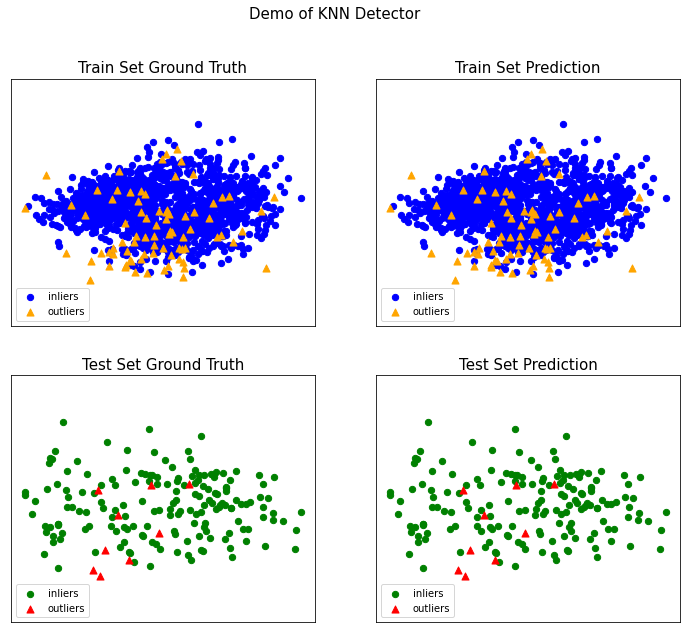

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 169,     # of outliers in val set: 9
Shape of train_df after OD: (1513, 70), val_df: (169, 70)
Before Balancing, counts of label '1': 1160
Before Balancing, counts of label '0': 353

After Balancing, counts of label '1': 1160
After Balancing, counts of label '0': 1160


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



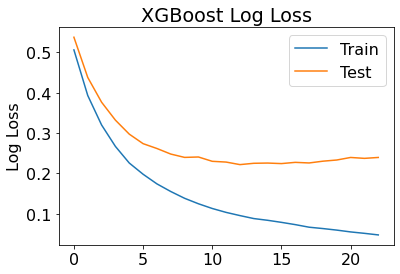

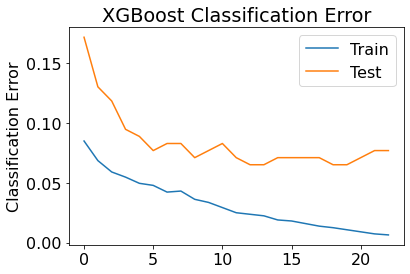


train_result: {'accuracy': 0.9762931034482759, 'ROC': 0.9762931034482759, 'precision': 0.976395420835777, 'recall': 0.9762931034482759, 'f1_score': 0.9762918304732102, 'matthews_corrcoef': 0.9526885187896822, 'confusion_matrix': array([[1141,   19],
       [  36, 1124]], dtype=int64), 'fpr': array([0.        , 0.01637931, 1.        ]), 'tpr': array([0.        , 0.96896552, 1.        ]), 'roc_auc': 0.9762931034482759}

test_result: {'accuracy': 0.9086294416243654, 'ROC': 0.882890365448505, 'precision': 0.859645390070922, 'recall': 0.882890365448505, 'f1_score': 0.8703947368421052, 'matthews_corrcoef': 0.7421718260244738, 'confusion_matrix': array([[ 36,   7],
       [ 11, 143]], dtype=int64), 'fpr': array([0.       , 0.1627907, 1.       ]), 'tpr': array([0.        , 0.92857143, 1.        ]), 'roc_auc': 0.882890365448505}

========= Run 1 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 364, grade-3: 1229
Shape of train_df before OD: (1593, 70), val_df: (178

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



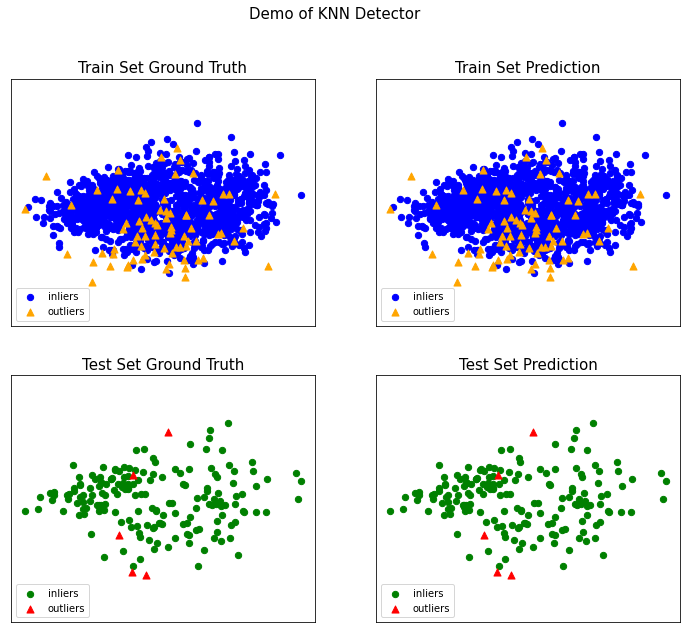

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 173,     # of outliers in val set: 5
Shape of train_df after OD: (1513, 70), val_df: (173, 70)
Before Balancing, counts of label '1': 1163
Before Balancing, counts of label '0': 350

After Balancing, counts of label '1': 1163
After Balancing, counts of label '0': 1163


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



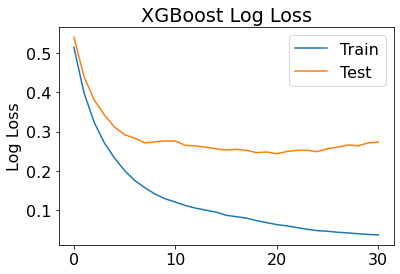

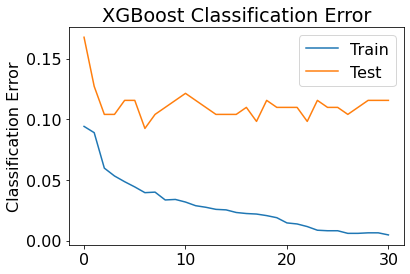


train_result: {'accuracy': 0.9853826311263972, 'ROC': 0.9853826311263973, 'precision': 0.9854343124387674, 'recall': 0.9853826311263972, 'f1_score': 0.985382242059898, 'matthews_corrcoef': 0.9708169421895407, 'confusion_matrix': array([[1152,   11],
       [  23, 1140]], dtype=int64), 'fpr': array([0.       , 0.0094583, 1.       ]), 'tpr': array([0.        , 0.98022356, 1.        ]), 'roc_auc': 0.9853826311263973}

test_result: {'accuracy': 0.9289340101522843, 'ROC': 0.9215801886792453, 'precision': 0.9031954887218046, 'recall': 0.9215801886792453, 'f1_score': 0.9117157490396927, 'matthews_corrcoef': 0.8245707494447251, 'confusion_matrix': array([[ 48,   5],
       [  9, 135]], dtype=int64), 'fpr': array([0.        , 0.09433962, 1.        ]), 'tpr': array([0.    , 0.9375, 1.    ]), 'roc_auc': 0.9215801886792453}

========= Run 2 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 360, grade-3: 1233
Shape of train_df before OD: (1593, 70), val_df: (178, 70)


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



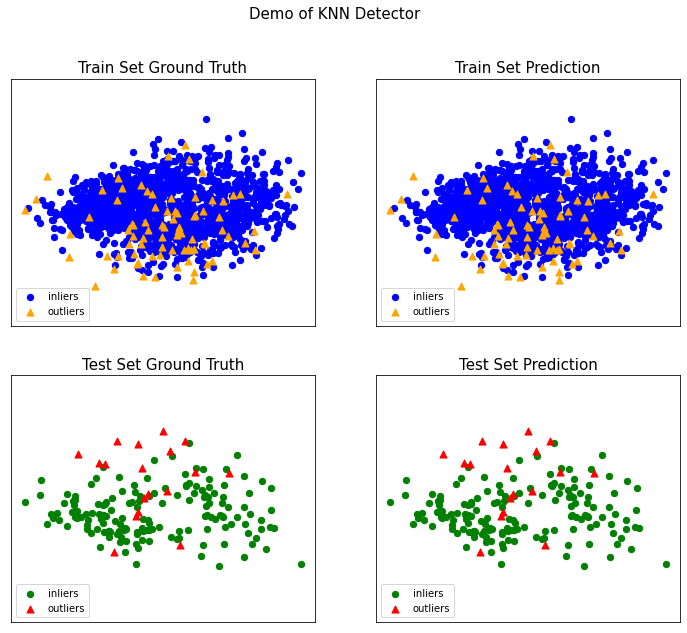

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 160,     # of outliers in val set: 18
Shape of train_df after OD: (1513, 70), val_df: (160, 70)
Before Balancing, counts of label '1': 1166
Before Balancing, counts of label '0': 347

After Balancing, counts of label '1': 1166
After Balancing, counts of label '0': 1166


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



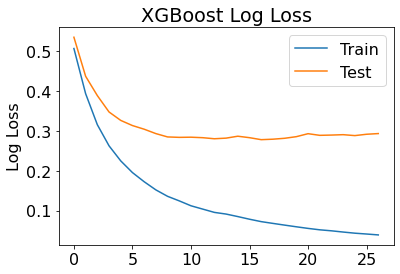

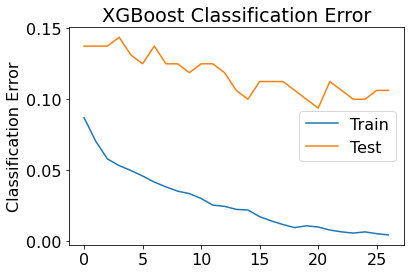


train_result: {'accuracy': 0.9858490566037735, 'ROC': 0.9858490566037735, 'precision': 0.9859780973296695, 'recall': 0.9858490566037736, 'f1_score': 0.9858481171739708, 'matthews_corrcoef': 0.9718271453663285, 'confusion_matrix': array([[1159,    7],
       [  26, 1140]], dtype=int64), 'fpr': array([0.        , 0.00600343, 1.        ]), 'tpr': array([0.        , 0.97770154, 1.        ]), 'roc_auc': 0.9858490566037735}

test_result: {'accuracy': 0.8984771573604061, 'ROC': 0.8857823129251701, 'precision': 0.8591058763931105, 'recall': 0.8857823129251701, 'f1_score': 0.8709381551362685, 'matthews_corrcoef': 0.7444103588208707, 'confusion_matrix': array([[ 43,   7],
       [ 13, 134]], dtype=int64), 'fpr': array([0.  , 0.14, 1.  ]), 'tpr': array([0.        , 0.91156463, 1.        ]), 'roc_auc': 0.8857823129251701}

========= Run 3 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 369, grade-3: 1224
Shape of train_df before OD: (1593, 70), val_df: (178, 70)


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



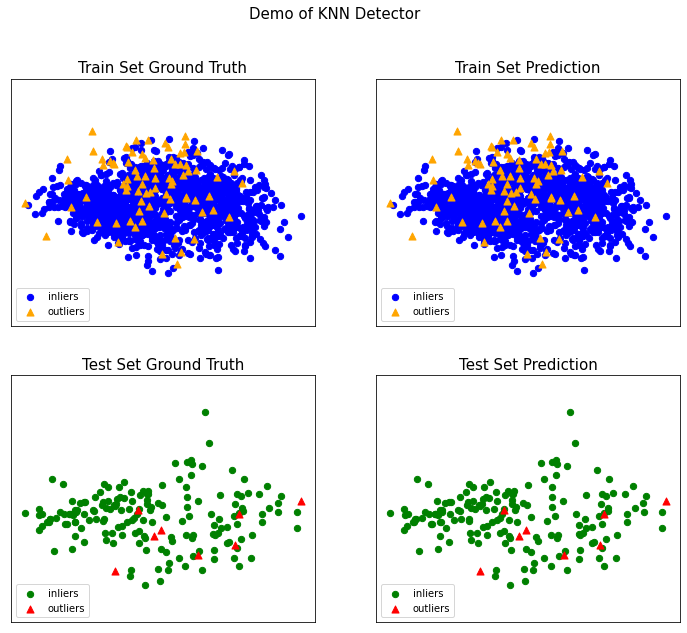

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 170,     # of outliers in val set: 8
Shape of train_df after OD: (1513, 70), val_df: (170, 70)
Before Balancing, counts of label '1': 1156
Before Balancing, counts of label '0': 357

After Balancing, counts of label '1': 1156
After Balancing, counts of label '0': 1156


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



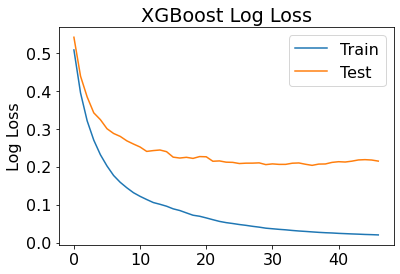

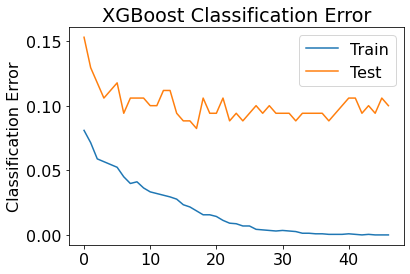


train_result: {'accuracy': 0.9991349480968859, 'ROC': 0.9991349480968859, 'precision': 0.9991364421416236, 'recall': 0.9991349480968859, 'f1_score': 0.9991349474495541, 'matthews_corrcoef': 0.9982713902373913, 'confusion_matrix': array([[1156,    0],
       [   2, 1154]], dtype=int64), 'fpr': array([0., 0., 1.]), 'tpr': array([0.       , 0.9982699, 1.       ]), 'roc_auc': 0.9991349480968859}

test_result: {'accuracy': 0.8883248730964467, 'ROC': 0.8463120567375887, 'precision': 0.8463120567375886, 'recall': 0.8463120567375886, 'f1_score': 0.8463120567375886, 'matthews_corrcoef': 0.6926241134751773, 'confusion_matrix': array([[ 36,  11],
       [ 11, 139]], dtype=int64), 'fpr': array([0.        , 0.23404255, 1.        ]), 'tpr': array([0.        , 0.92666667, 1.        ]), 'roc_auc': 0.8463120567375887}

========= Run 4 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 363, grade-3: 1230
Shape of train_df before OD: (1593, 70), val_df: (178, 70)


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



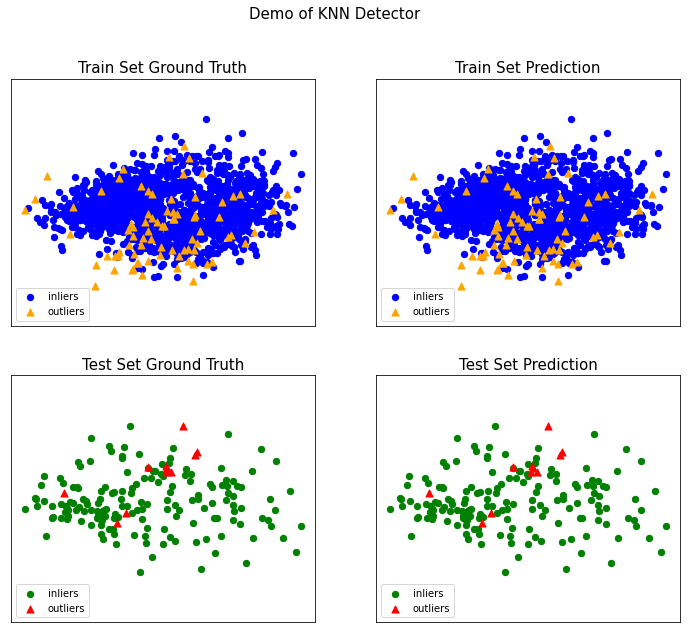

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 167,     # of outliers in val set: 11
Shape of train_df after OD: (1513, 70), val_df: (167, 70)
Before Balancing, counts of label '1': 1163
Before Balancing, counts of label '0': 350

After Balancing, counts of label '1': 1163
After Balancing, counts of label '0': 1163


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



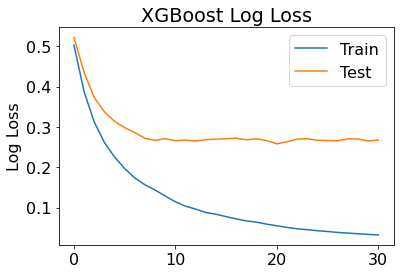

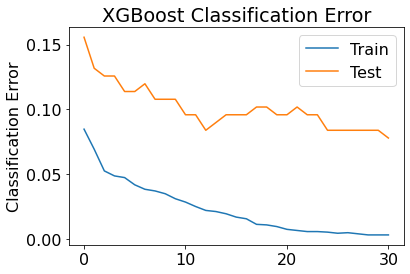


train_result: {'accuracy': 0.9926913155631987, 'ROC': 0.9926913155631987, 'precision': 0.9927004223152814, 'recall': 0.9926913155631987, 'f1_score': 0.9926912817908078, 'matthews_corrcoef': 0.9853917378363989, 'confusion_matrix': array([[1157,    6],
       [  11, 1152]], dtype=int64), 'fpr': array([0.        , 0.00515907, 1.        ]), 'tpr': array([0.       , 0.9905417, 1.       ]), 'roc_auc': 0.9926913155631987}

test_result: {'accuracy': 0.8781725888324873, 'ROC': 0.8476363147998924, 'precision': 0.8391640461215933, 'recall': 0.8476363147998925, 'f1_score': 0.843236074270557, 'matthews_corrcoef': 0.6867481026004556, 'confusion_matrix': array([[ 40,  11],
       [ 13, 133]], dtype=int64), 'fpr': array([0.        , 0.21568627, 1.        ]), 'tpr': array([0.       , 0.9109589, 1.       ]), 'roc_auc': 0.8476363147998924}

========= Run 5 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 357, grade-3: 1236
Shape of train_df before OD: (1593, 70), val_df: (17

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



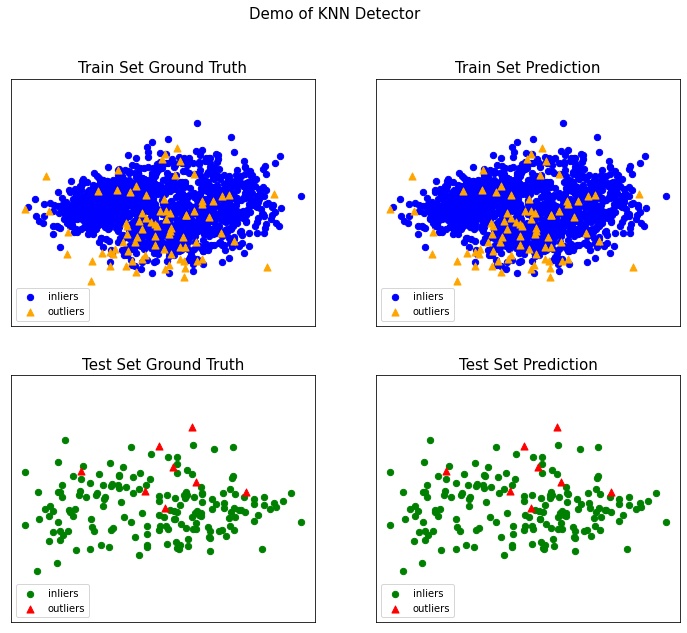

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 170,     # of outliers in val set: 8
Shape of train_df after OD: (1513, 70), val_df: (170, 70)
Before Balancing, counts of label '1': 1171
Before Balancing, counts of label '0': 342

After Balancing, counts of label '1': 1171
After Balancing, counts of label '0': 1171


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



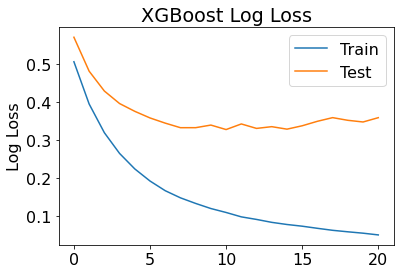

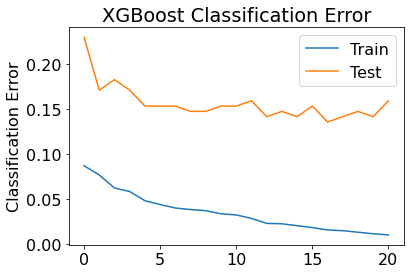


train_result: {'accuracy': 0.9679760888129804, 'ROC': 0.9679760888129804, 'precision': 0.968052889244181, 'recall': 0.9679760888129804, 'f1_score': 0.9679747750986876, 'matthews_corrcoef': 0.9360289749064543, 'confusion_matrix': array([[1141,   30],
       [  45, 1126]], dtype=int64), 'fpr': array([0.        , 0.02561913, 1.        ]), 'tpr': array([0.        , 0.96157131, 1.        ]), 'roc_auc': 0.9679760888129804}

test_result: {'accuracy': 0.8883248730964467, 'ROC': 0.8696868008948546, 'precision': 0.8423983423983423, 'recall': 0.8696868008948546, 'f1_score': 0.8544856298683857, 'matthews_corrcoef': 0.7115620783401664, 'confusion_matrix': array([[ 40,   8],
       [ 14, 135]], dtype=int64), 'fpr': array([0.        , 0.16666667, 1.        ]), 'tpr': array([0.        , 0.90604027, 1.        ]), 'roc_auc': 0.8696868008948546}

========= Run 6 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 372, grade-3: 1221
Shape of train_df before OD: (1593, 70), val_d

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



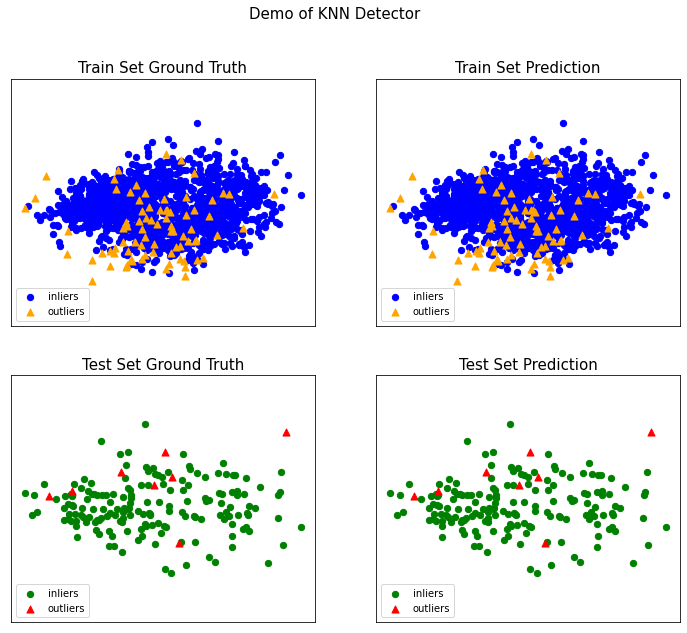

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 170,     # of outliers in val set: 8
Shape of train_df after OD: (1513, 70), val_df: (170, 70)
Before Balancing, counts of label '1': 1154
Before Balancing, counts of label '0': 359

After Balancing, counts of label '1': 1154
After Balancing, counts of label '0': 1154


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



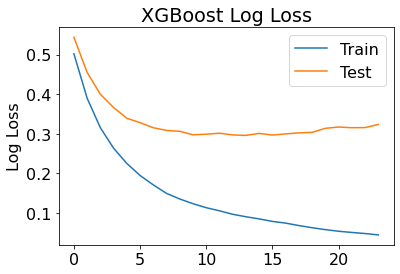

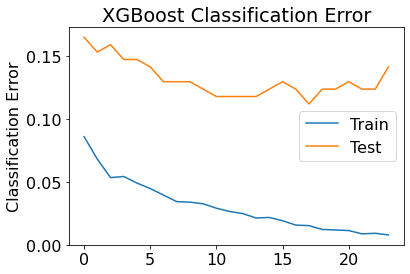


train_result: {'accuracy': 0.9787694974003466, 'ROC': 0.9787694974003466, 'precision': 0.9788993168613931, 'recall': 0.9787694974003467, 'f1_score': 0.9787680585179432, 'matthews_corrcoef': 0.9576688054627205, 'confusion_matrix': array([[1139,   15],
       [  34, 1120]], dtype=int64), 'fpr': array([0.        , 0.01299827, 1.        ]), 'tpr': array([0.        , 0.97053726, 1.        ]), 'roc_auc': 0.9787694974003466}

test_result: {'accuracy': 0.8883248730964467, 'ROC': 0.884537210756723, 'precision': 0.8222615303983228, 'recall': 0.884537210756723, 'f1_score': 0.8463120567375887, 'matthews_corrcoef': 0.7040498562845218, 'confusion_matrix': array([[ 36,   5],
       [ 17, 139]], dtype=int64), 'fpr': array([0.        , 0.12195122, 1.        ]), 'tpr': array([0.        , 0.89102564, 1.        ]), 'roc_auc': 0.884537210756723}

========= Run 7 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 374, grade-3: 1219
Shape of train_df before OD: (1593, 70), val_df:

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



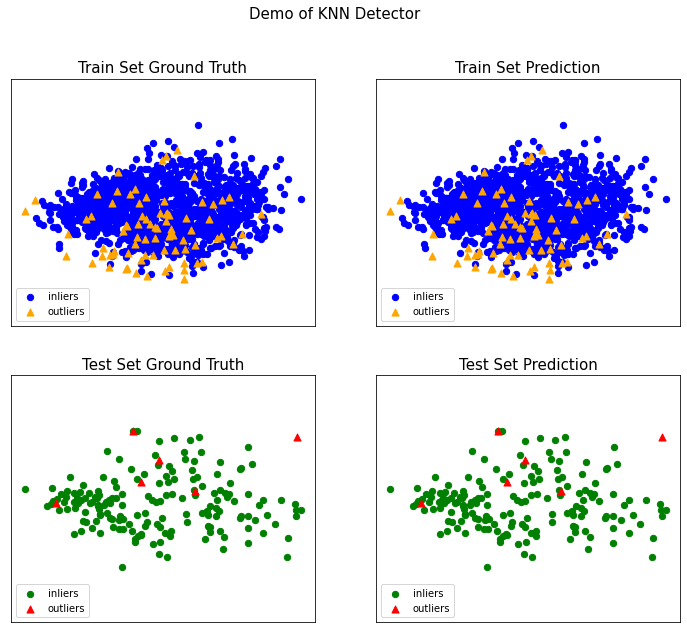

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 172,     # of outliers in val set: 6
Shape of train_df after OD: (1513, 70), val_df: (172, 70)
Before Balancing, counts of label '1': 1154
Before Balancing, counts of label '0': 359

After Balancing, counts of label '1': 1154
After Balancing, counts of label '0': 1154


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



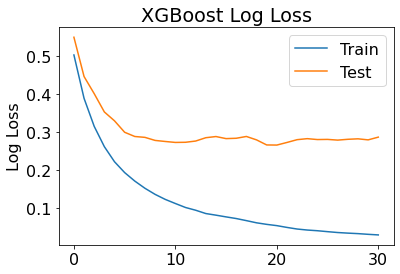

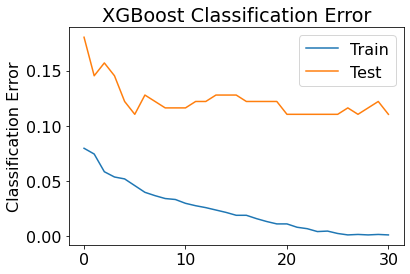


train_result: {'accuracy': 0.988734835355286, 'ROC': 0.988734835355286, 'precision': 0.988740707366524, 'recall': 0.988734835355286, 'f1_score': 0.9887348015186467, 'matthews_corrcoef': 0.9774755427041724, 'confusion_matrix': array([[1143,   11],
       [  15, 1139]], dtype=int64), 'fpr': array([0.        , 0.00953206, 1.        ]), 'tpr': array([0.        , 0.98700173, 1.        ]), 'roc_auc': 0.988734835355286}

test_result: {'accuracy': 0.9035532994923858, 'ROC': 0.8547273982056591, 'precision': 0.8336579032781564, 'recall': 0.8547273982056591, 'f1_score': 0.8435527690700104, 'matthews_corrcoef': 0.6880627876018753, 'confusion_matrix': array([[ 28,   8],
       [ 11, 150]], dtype=int64), 'fpr': array([0.        , 0.22222222, 1.        ]), 'tpr': array([0.        , 0.93167702, 1.        ]), 'roc_auc': 0.8547273982056591}

========= Run 8 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 357, grade-3: 1236
Shape of train_df before OD: (1593, 70), val_df: (

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



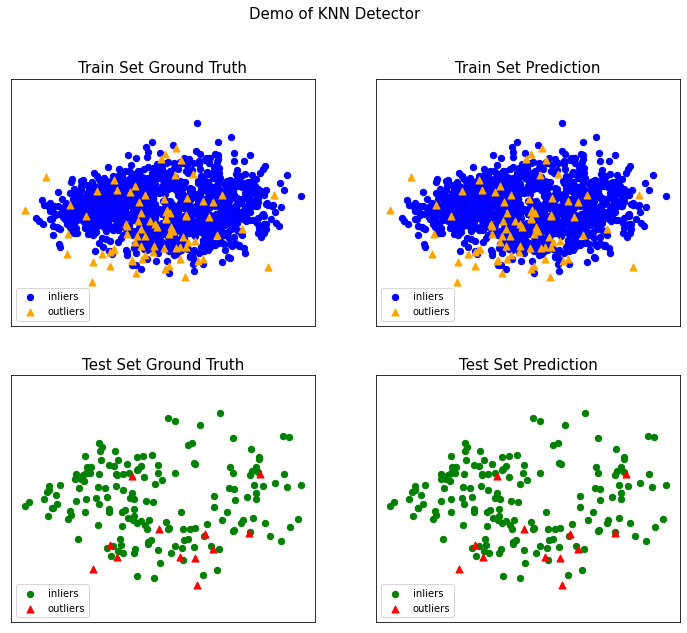

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 166,     # of outliers in val set: 12
Shape of train_df after OD: (1513, 70), val_df: (166, 70)
Before Balancing, counts of label '1': 1169
Before Balancing, counts of label '0': 344

After Balancing, counts of label '1': 1169
After Balancing, counts of label '0': 1169


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



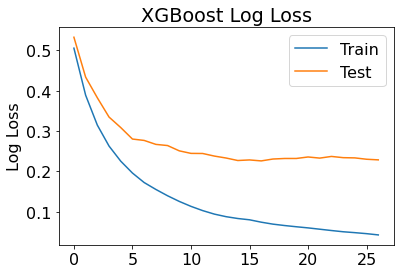

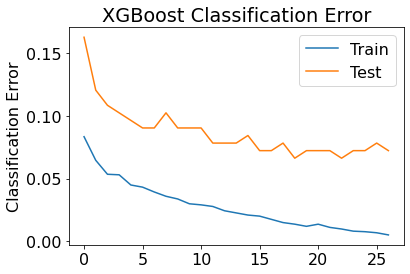


train_result: {'accuracy': 0.9824636441402909, 'ROC': 0.982463644140291, 'precision': 0.9825911286780852, 'recall': 0.9824636441402909, 'f1_score': 0.9824624859331968, 'matthews_corrcoef': 0.9650547643979693, 'confusion_matrix': array([[1158,   11],
       [  30, 1139]], dtype=int64), 'fpr': array([0.        , 0.00940975, 1.        ]), 'tpr': array([0.        , 0.97433704, 1.        ]), 'roc_auc': 0.982463644140291}

test_result: {'accuracy': 0.8934010152284264, 'ROC': 0.8793894129979036, 'precision': 0.8591540560654924, 'recall': 0.8793894129979036, 'f1_score': 0.8683029319071722, 'matthews_corrcoef': 0.7382662026843795, 'confusion_matrix': array([[ 45,   8],
       [ 13, 131]], dtype=int64), 'fpr': array([0.       , 0.1509434, 1.       ]), 'tpr': array([0.        , 0.90972222, 1.        ]), 'roc_auc': 0.8793894129979036}

========= Run 9 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 368, grade-3: 1225
Shape of train_df before OD: (1593, 70), val_df: (

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



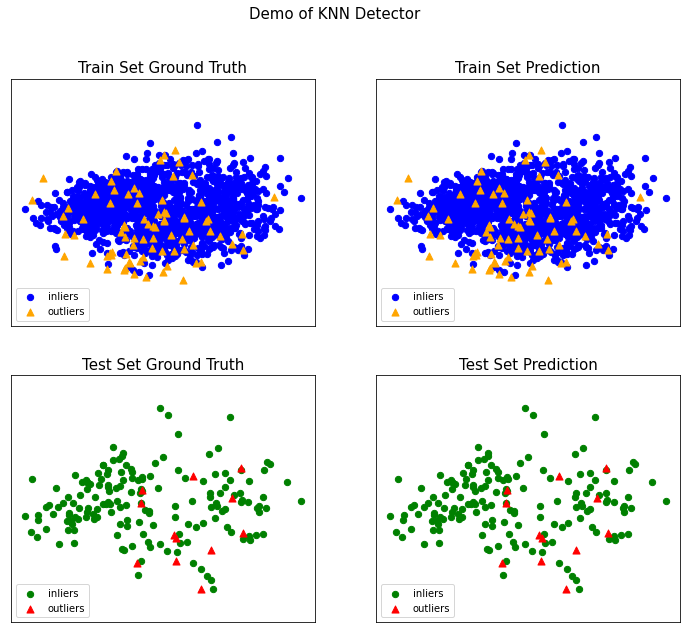

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 166,     # of outliers in val set: 12
Shape of train_df after OD: (1513, 70), val_df: (166, 70)
Before Balancing, counts of label '1': 1156
Before Balancing, counts of label '0': 357

After Balancing, counts of label '1': 1156
After Balancing, counts of label '0': 1156


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



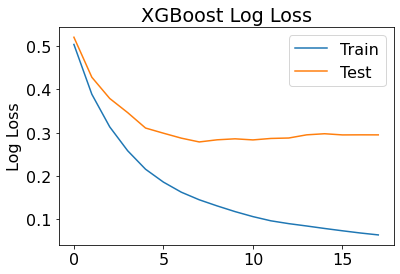

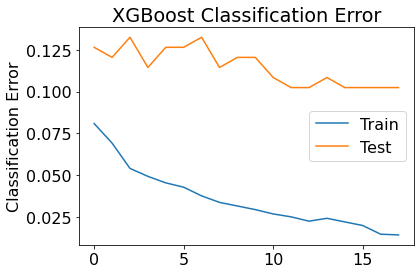


train_result: {'accuracy': 0.9662629757785467, 'ROC': 0.9662629757785467, 'precision': 0.9667156040268456, 'recall': 0.9662629757785467, 'f1_score': 0.9662547941186157, 'matthews_corrcoef': 0.9329784700106192, 'confusion_matrix': array([[1135,   21],
       [  57, 1099]], dtype=int64), 'fpr': array([0.        , 0.01816609, 1.        ]), 'tpr': array([0.        , 0.95069204, 1.        ]), 'roc_auc': 0.9662629757785467}

test_result: {'accuracy': 0.883248730964467, 'ROC': 0.8519756387403445, 'precision': 0.8267374517374517, 'recall': 0.8519756387403445, 'f1_score': 0.8381381059550601, 'matthews_corrcoef': 0.6782436826854552, 'confusion_matrix': array([[ 35,   9],
       [ 14, 139]], dtype=int64), 'fpr': array([0.        , 0.20454545, 1.        ]), 'tpr': array([0.        , 0.90849673, 1.        ]), 'roc_auc': 0.8519756387403445}

========= Run 10 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 366, grade-3: 1227
Shape of train_df before OD: (1593, 70), val_

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



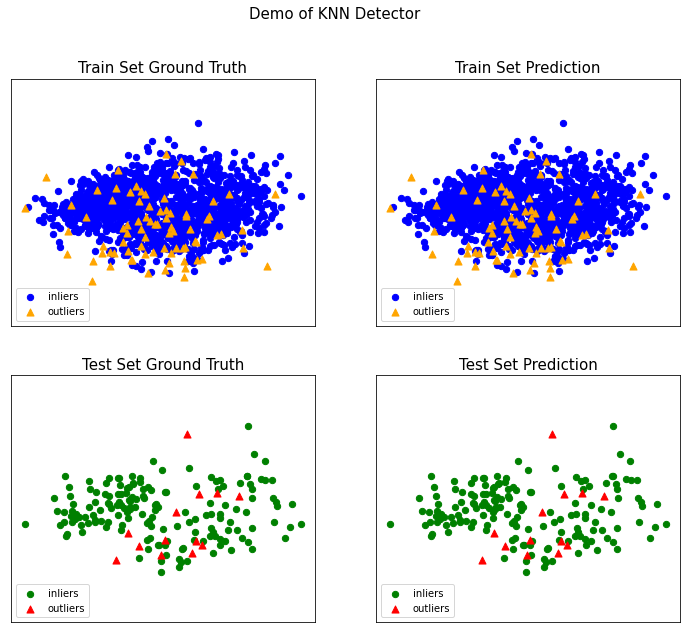

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 165,     # of outliers in val set: 13
Shape of train_df after OD: (1513, 70), val_df: (165, 70)
Before Balancing, counts of label '1': 1158
Before Balancing, counts of label '0': 355

After Balancing, counts of label '1': 1158
After Balancing, counts of label '0': 1158


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



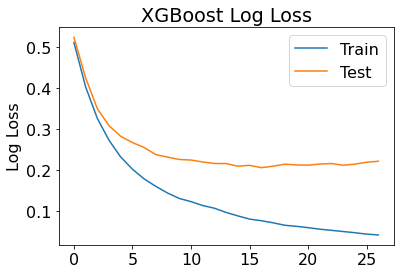

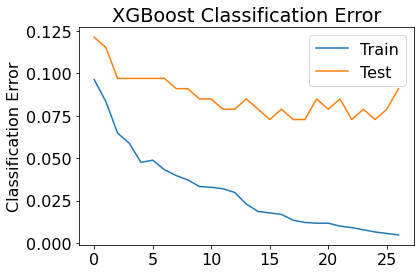


train_result: {'accuracy': 0.9831606217616581, 'ROC': 0.983160621761658, 'precision': 0.9833195700484065, 'recall': 0.983160621761658, 'f1_score': 0.9831592371651271, 'matthews_corrcoef': 0.9664801787396683, 'confusion_matrix': array([[1149,    9],
       [  30, 1128]], dtype=int64), 'fpr': array([0.        , 0.00777202, 1.        ]), 'tpr': array([0.        , 0.97409326, 1.        ]), 'roc_auc': 0.983160621761658}

test_result: {'accuracy': 0.9137055837563451, 'ROC': 0.8971491228070176, 'precision': 0.8695918367346939, 'recall': 0.8971491228070176, 'f1_score': 0.8820982221439887, 'matthews_corrcoef': 0.7662455840155117, 'confusion_matrix': array([[ 39,   6],
       [ 11, 141]], dtype=int64), 'fpr': array([0.        , 0.13333333, 1.        ]), 'tpr': array([0.        , 0.92763158, 1.        ]), 'roc_auc': 0.8971491228070176}

========= Run 11 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 369, grade-3: 1224
Shape of train_df before OD: (1593, 70), val_df

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



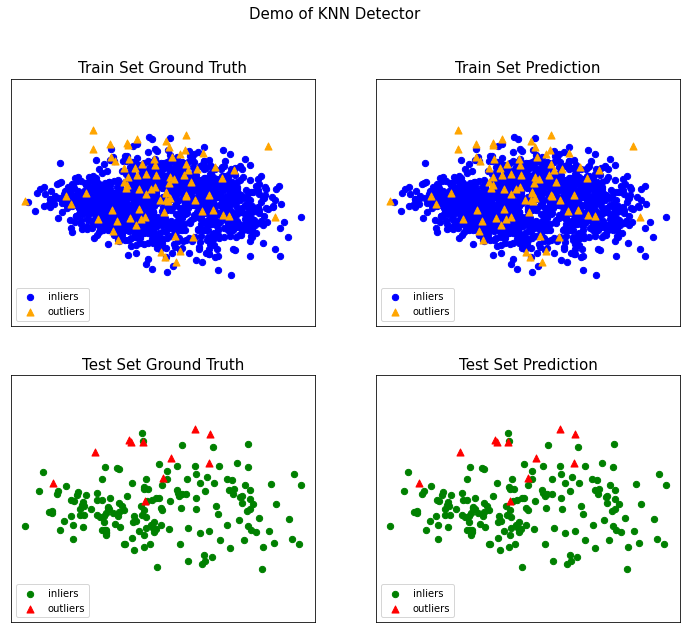

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 167,     # of outliers in val set: 11
Shape of train_df after OD: (1513, 70), val_df: (167, 70)
Before Balancing, counts of label '1': 1157
Before Balancing, counts of label '0': 356

After Balancing, counts of label '1': 1157
After Balancing, counts of label '0': 1157


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



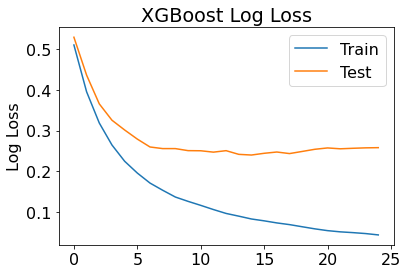

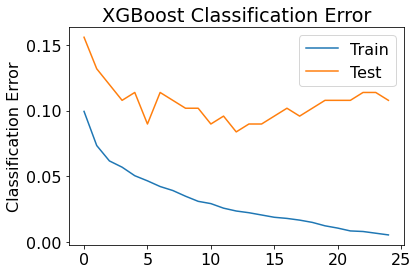


train_result: {'accuracy': 0.9792566983578219, 'ROC': 0.9792566983578219, 'precision': 0.9794988389152846, 'recall': 0.9792566983578219, 'f1_score': 0.9792540792540794, 'matthews_corrcoef': 0.9587555066959426, 'confusion_matrix': array([[1146,   11],
       [  37, 1120]], dtype=int64), 'fpr': array([0.        , 0.00950735, 1.        ]), 'tpr': array([0.        , 0.96802074, 1.        ]), 'roc_auc': 0.9792566983578219}

test_result: {'accuracy': 0.8883248730964467, 'ROC': 0.8536170212765958, 'precision': 0.8437672366243795, 'recall': 0.8536170212765958, 'f1_score': 0.8485039149888143, 'matthews_corrcoef': 0.697314695751064, 'confusion_matrix': array([[ 37,  10],
       [ 12, 138]], dtype=int64), 'fpr': array([0.        , 0.21276596, 1.        ]), 'tpr': array([0.  , 0.92, 1.  ]), 'roc_auc': 0.8536170212765958}

========= Run 12 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 375, grade-3: 1218
Shape of train_df before OD: (1593, 70), val_df: (178, 70)


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



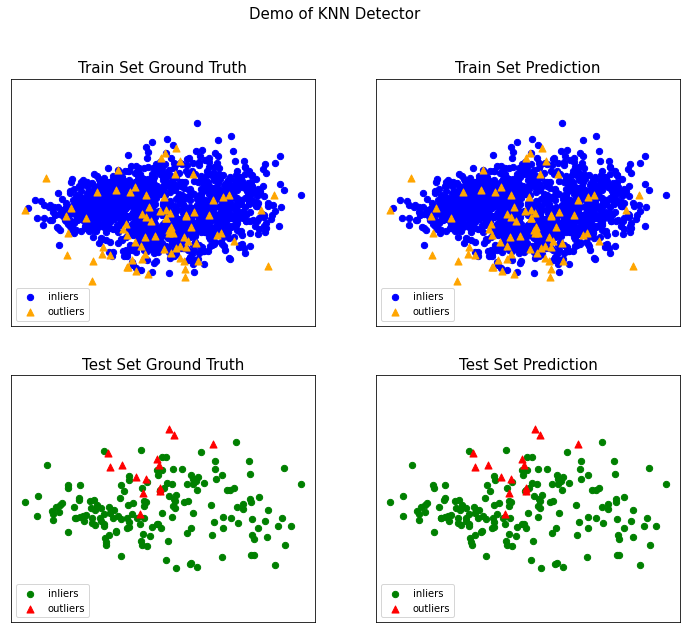

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 164,     # of outliers in val set: 14
Shape of train_df after OD: (1513, 70), val_df: (164, 70)
Before Balancing, counts of label '1': 1150
Before Balancing, counts of label '0': 363

After Balancing, counts of label '1': 1150
After Balancing, counts of label '0': 1150


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



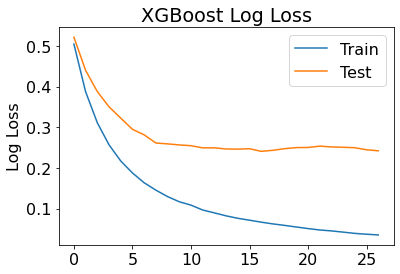

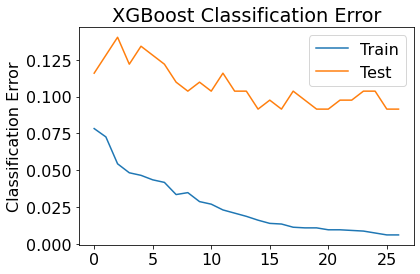


train_result: {'accuracy': 0.9865217391304347, 'ROC': 0.9865217391304348, 'precision': 0.9865515392625182, 'recall': 0.9865217391304348, 'f1_score': 0.9865215327493673, 'matthews_corrcoef': 0.9730732779366421, 'confusion_matrix': array([[1139,   11],
       [  20, 1130]], dtype=int64), 'fpr': array([0.        , 0.00956522, 1.        ]), 'tpr': array([0.       , 0.9826087, 1.       ]), 'roc_auc': 0.9865217391304348}

test_result: {'accuracy': 0.8883248730964467, 'ROC': 0.8390522875816994, 'precision': 0.8390522875816994, 'recall': 0.8390522875816994, 'f1_score': 0.8390522875816994, 'matthews_corrcoef': 0.6781045751633987, 'confusion_matrix': array([[ 33,  11],
       [ 11, 142]], dtype=int64), 'fpr': array([0.  , 0.25, 1.  ]), 'tpr': array([0.        , 0.92810458, 1.        ]), 'roc_auc': 0.8390522875816994}

========= Run 13 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 361, grade-3: 1232
Shape of train_df before OD: (1593, 70), val_df: (178, 70)


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



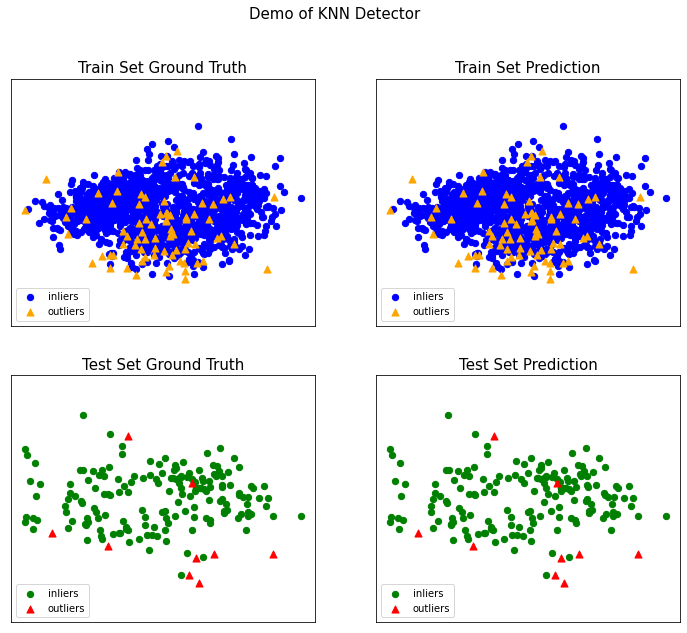

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 169,     # of outliers in val set: 9
Shape of train_df after OD: (1513, 70), val_df: (169, 70)
Before Balancing, counts of label '1': 1164
Before Balancing, counts of label '0': 349

After Balancing, counts of label '1': 1164
After Balancing, counts of label '0': 1164


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



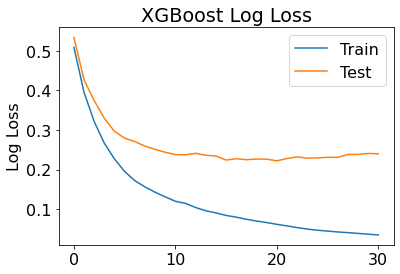

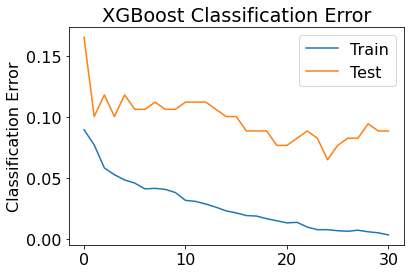


train_result: {'accuracy': 0.9866838487972509, 'ROC': 0.9866838487972509, 'precision': 0.9867876808550378, 'recall': 0.9866838487972509, 'f1_score': 0.9866831386739419, 'matthews_corrcoef': 0.9734715241148404, 'confusion_matrix': array([[1157,    7],
       [  24, 1140]], dtype=int64), 'fpr': array([0.        , 0.00601375, 1.        ]), 'tpr': array([0.        , 0.97938144, 1.        ]), 'roc_auc': 0.9866838487972509}

test_result: {'accuracy': 0.9035532994923858, 'ROC': 0.8743794815223387, 'precision': 0.8693877551020408, 'recall': 0.8743794815223387, 'f1_score': 0.8718370142098957, 'matthews_corrcoef': 0.7437504856759494, 'confusion_matrix': array([[ 40,   9],
       [ 10, 138]], dtype=int64), 'fpr': array([0.        , 0.18367347, 1.        ]), 'tpr': array([0.        , 0.93243243, 1.        ]), 'roc_auc': 0.8743794815223387}

========= Run 14 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 370, grade-3: 1223
Shape of train_df before OD: (1593, 70), val

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



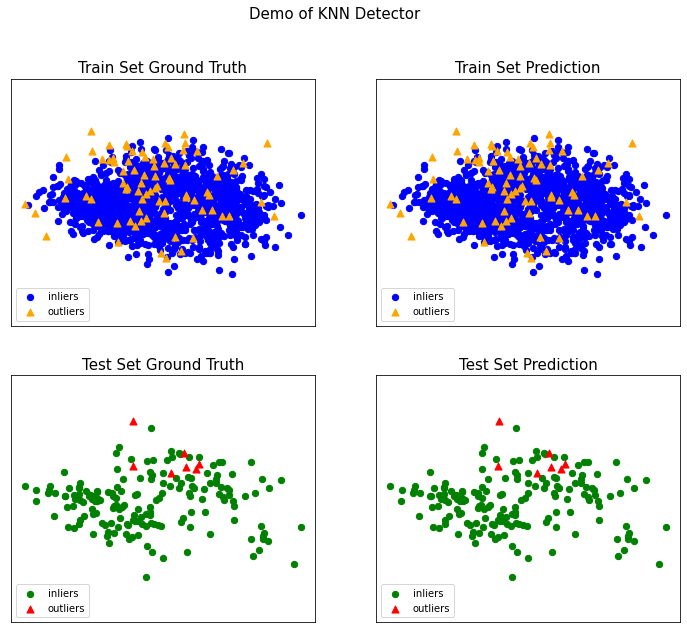

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 171,     # of outliers in val set: 7
Shape of train_df after OD: (1513, 70), val_df: (171, 70)
Before Balancing, counts of label '1': 1154
Before Balancing, counts of label '0': 359

After Balancing, counts of label '1': 1154
After Balancing, counts of label '0': 1154


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



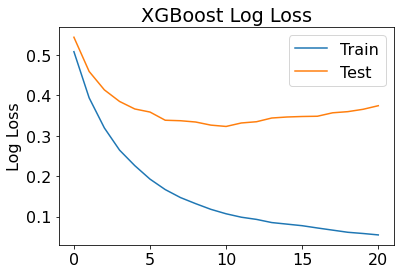

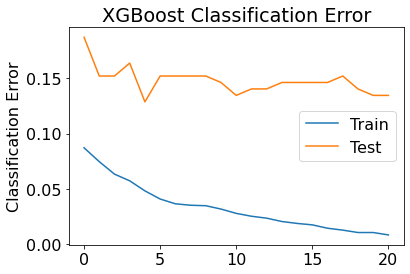


train_result: {'accuracy': 0.9722703639514731, 'ROC': 0.972270363951473, 'precision': 0.9724747209159066, 'recall': 0.9722703639514731, 'f1_score': 0.9722673651894151, 'matthews_corrcoef': 0.9447450627652435, 'confusion_matrix': array([[1134,   20],
       [  44, 1110]], dtype=int64), 'fpr': array([0.        , 0.01733102, 1.        ]), 'tpr': array([0.        , 0.96187175, 1.        ]), 'roc_auc': 0.972270363951473}

test_result: {'accuracy': 0.8984771573604061, 'ROC': 0.8710011031439603, 'precision': 0.8613349449368788, 'recall': 0.8710011031439603, 'f1_score': 0.8659863945578232, 'matthews_corrcoef': 0.7322722531300614, 'confusion_matrix': array([[ 40,   9],
       [ 11, 137]], dtype=int64), 'fpr': array([0.        , 0.18367347, 1.        ]), 'tpr': array([0.        , 0.92567568, 1.        ]), 'roc_auc': 0.8710011031439603}

========= Run 15 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 363, grade-3: 1230
Shape of train_df before OD: (1593, 70), val_d

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



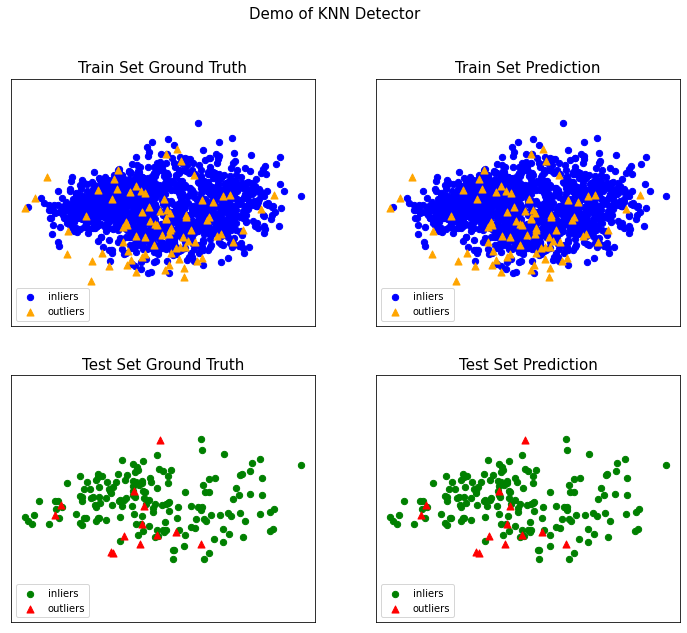

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 165,     # of outliers in val set: 13
Shape of train_df after OD: (1513, 70), val_df: (165, 70)
Before Balancing, counts of label '1': 1165
Before Balancing, counts of label '0': 348

After Balancing, counts of label '1': 1165
After Balancing, counts of label '0': 1165


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



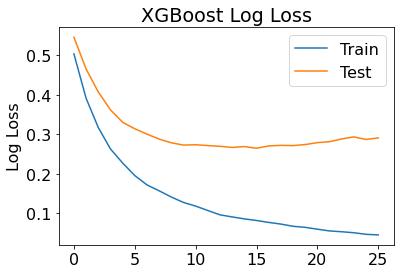

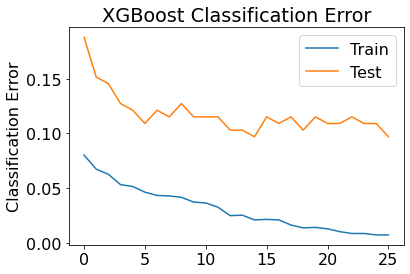


train_result: {'accuracy': 0.9785407725321889, 'ROC': 0.9785407725321887, 'precision': 0.9786310519989772, 'recall': 0.9785407725321889, 'f1_score': 0.978539760573727, 'matthews_corrcoef': 0.9571718202736326, 'confusion_matrix': array([[1148,   17],
       [  33, 1132]], dtype=int64), 'fpr': array([0.        , 0.01459227, 1.        ]), 'tpr': array([0.        , 0.97167382, 1.        ]), 'roc_auc': 0.9785407725321887}

test_result: {'accuracy': 0.9035532994923858, 'ROC': 0.8922955974842767, 'precision': 0.8713718680228231, 'recall': 0.8922955974842768, 'f1_score': 0.8808455098207748, 'matthews_corrcoef': 0.7633807669960394, 'confusion_matrix': array([[ 46,   7],
       [ 12, 132]], dtype=int64), 'fpr': array([0.        , 0.13207547, 1.        ]), 'tpr': array([0.        , 0.91666667, 1.        ]), 'roc_auc': 0.8922955974842767}

========= Run 16 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 377, grade-3: 1216
Shape of train_df before OD: (1593, 70), val_

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



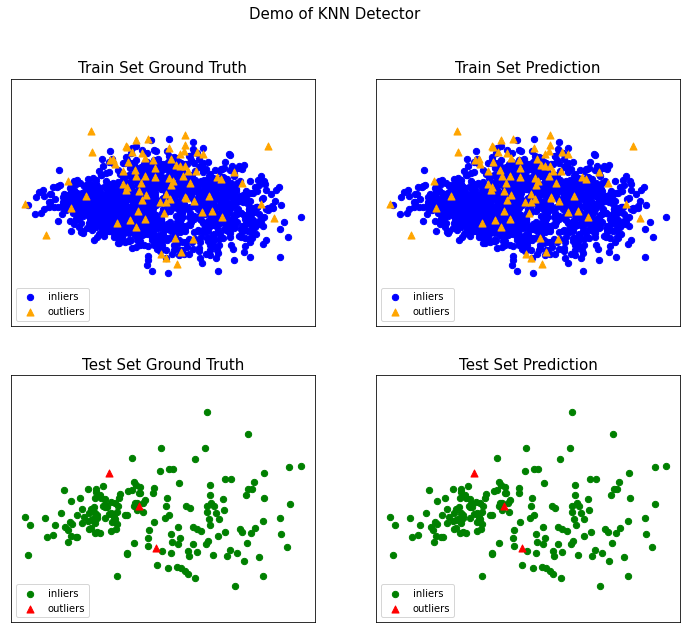

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 175,     # of outliers in val set: 3
Shape of train_df after OD: (1513, 70), val_df: (175, 70)
Before Balancing, counts of label '1': 1152
Before Balancing, counts of label '0': 361

After Balancing, counts of label '1': 1152
After Balancing, counts of label '0': 1152


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



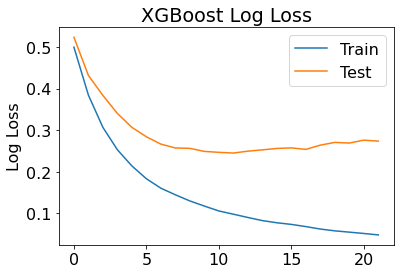

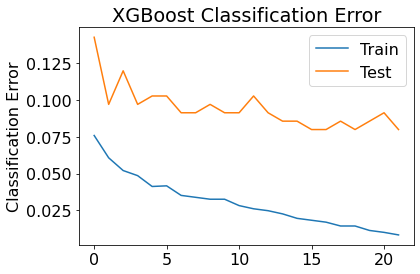


train_result: {'accuracy': 0.9739583333333334, 'ROC': 0.9739583333333334, 'precision': 0.9741998811846553, 'recall': 0.9739583333333334, 'f1_score': 0.9739550166360824, 'matthews_corrcoef': 0.9481581837502516, 'confusion_matrix': array([[1135,   17],
       [  43, 1109]], dtype=int64), 'fpr': array([0.        , 0.01475694, 1.        ]), 'tpr': array([0.        , 0.96267361, 1.        ]), 'roc_auc': 0.9739583333333334}

test_result: {'accuracy': 0.8426395939086294, 'ROC': 0.8035273368606701, 'precision': 0.740631991051454, 'recall': 0.8035273368606701, 'f1_score': 0.7634137837523729, 'matthews_corrcoef': 0.5405123029398258, 'confusion_matrix': array([[ 26,   9],
       [ 22, 140]], dtype=int64), 'fpr': array([0.        , 0.25714286, 1.        ]), 'tpr': array([0.        , 0.86419753, 1.        ]), 'roc_auc': 0.8035273368606701}

========= Run 17 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 369, grade-3: 1224
Shape of train_df before OD: (1593, 70), val_

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



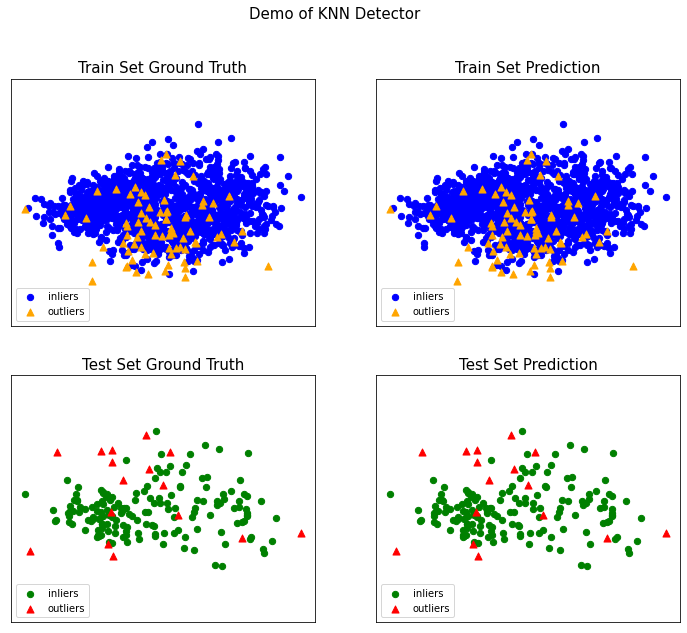

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 162,     # of outliers in val set: 16
Shape of train_df after OD: (1513, 70), val_df: (162, 70)
Before Balancing, counts of label '1': 1157
Before Balancing, counts of label '0': 356

After Balancing, counts of label '1': 1157
After Balancing, counts of label '0': 1157


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



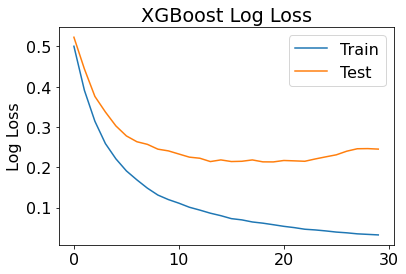

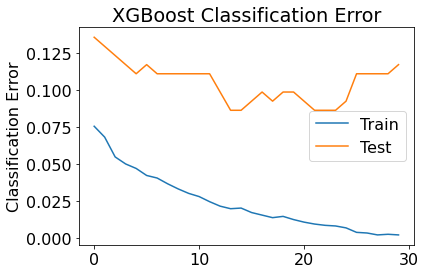


train_result: {'accuracy': 0.9874675885911841, 'ROC': 0.987467588591184, 'precision': 0.9874970864386419, 'recall': 0.9874675885911841, 'f1_score': 0.9874673990081269, 'matthews_corrcoef': 0.9749646745835929, 'confusion_matrix': array([[1147,   10],
       [  19, 1138]], dtype=int64), 'fpr': array([0.        , 0.00864304, 1.        ]), 'tpr': array([0.        , 0.98357822, 1.        ]), 'roc_auc': 0.987467588591184}

test_result: {'accuracy': 0.8984771573604061, 'ROC': 0.8428722440350347, 'precision': 0.8549874921826142, 'recall': 0.8428722440350347, 'f1_score': 0.8486943164362519, 'matthews_corrcoef': 0.6977545644394518, 'confusion_matrix': array([[ 32,  11],
       [  9, 145]], dtype=int64), 'fpr': array([0.        , 0.25581395, 1.        ]), 'tpr': array([0.        , 0.94155844, 1.        ]), 'roc_auc': 0.8428722440350347}

========= Run 18 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 368, grade-3: 1225
Shape of train_df before OD: (1593, 70), val_d

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



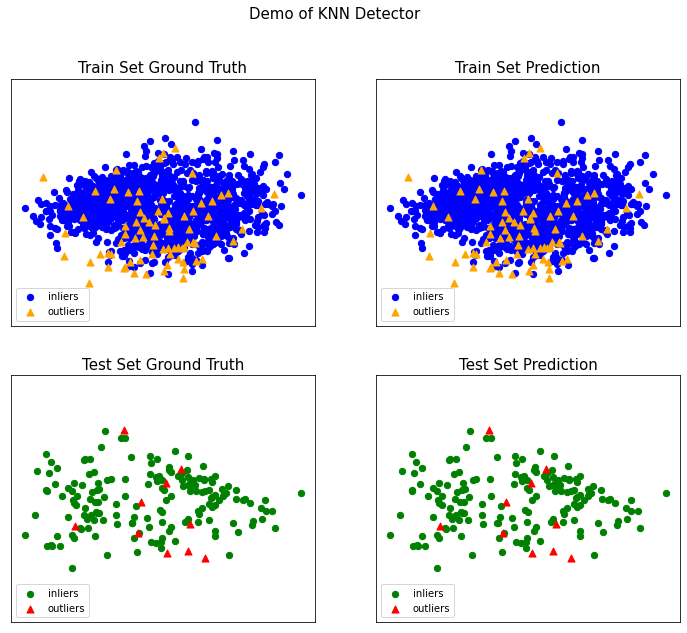

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 168,     # of outliers in val set: 10
Shape of train_df after OD: (1513, 70), val_df: (168, 70)
Before Balancing, counts of label '1': 1161
Before Balancing, counts of label '0': 352

After Balancing, counts of label '1': 1161
After Balancing, counts of label '0': 1161


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



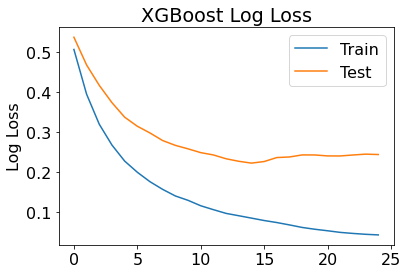

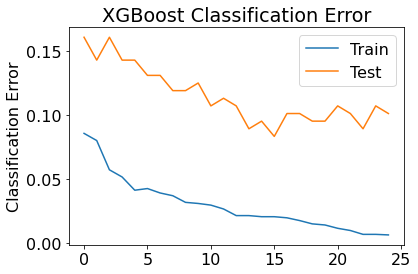


train_result: {'accuracy': 0.979328165374677, 'ROC': 0.979328165374677, 'precision': 0.9794434092684979, 'recall': 0.979328165374677, 'f1_score': 0.979326923076923, 'matthews_corrcoef': 0.958771567717044, 'confusion_matrix': array([[1146,   15],
       [  33, 1128]], dtype=int64), 'fpr': array([0.       , 0.0129199, 1.       ]), 'tpr': array([0.        , 0.97157623, 1.        ]), 'roc_auc': 0.979328165374677}

test_result: {'accuracy': 0.8578680203045685, 'ROC': 0.8418570009930487, 'precision': 0.7739389920424403, 'recall': 0.8418570009930486, 'f1_score': 0.7983918128654972, 'matthews_corrcoef': 0.6120390911524762, 'confusion_matrix': array([[ 31,   7],
       [ 21, 138]], dtype=int64), 'fpr': array([0.        , 0.18421053, 1.        ]), 'tpr': array([0.        , 0.86792453, 1.        ]), 'roc_auc': 0.8418570009930487}

========= Run 19 ==========
train_df size: 1593, val_df size: 178, test_df size: 197
grade-1 : 362, grade-3: 1231
Shape of train_df before OD: (1593, 70), val_df: (178

C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



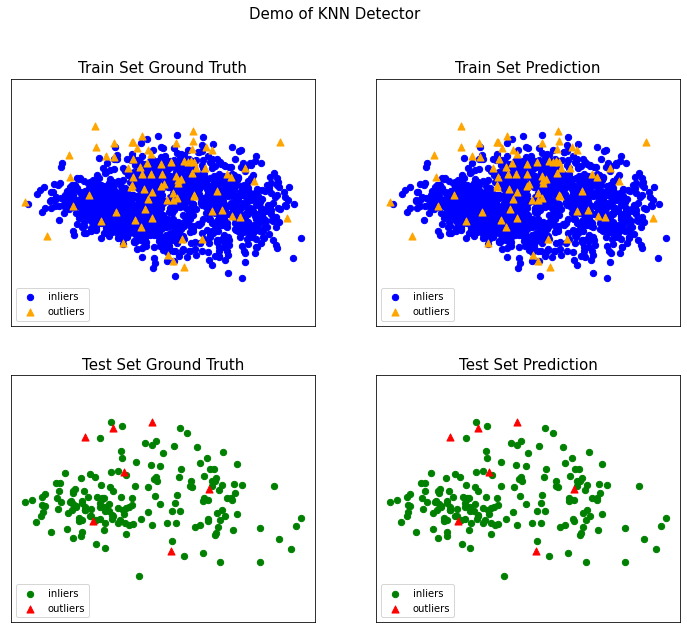

# of inliers in train set: 1513, # of outliers in train set: 80
# of inliers in val set: 171,     # of outliers in val set: 7
Shape of train_df after OD: (1513, 70), val_df: (171, 70)
Before Balancing, counts of label '1': 1164
Before Balancing, counts of label '0': 349

After Balancing, counts of label '1': 1164
After Balancing, counts of label '0': 1164


C:\Users\Harvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



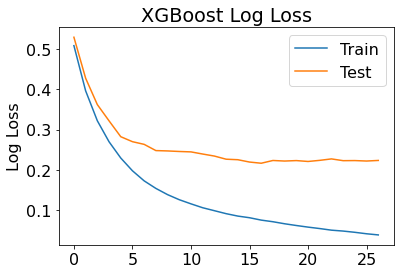

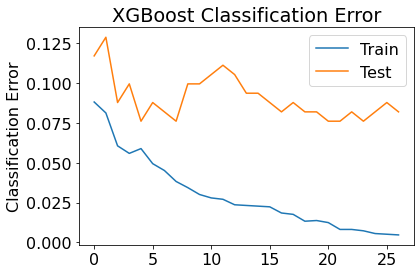


train_result: {'accuracy': 0.9815292096219931, 'ROC': 0.9815292096219932, 'precision': 0.9817514367508424, 'recall': 0.9815292096219932, 'f1_score': 0.9815270792785109, 'matthews_corrcoef': 0.9632806207391338, 'confusion_matrix': array([[1155,    9],
       [  34, 1130]], dtype=int64), 'fpr': array([0.        , 0.00773196, 1.        ]), 'tpr': array([0.        , 0.97079038, 1.        ]), 'roc_auc': 0.9815292096219932}

test_result: {'accuracy': 0.8934010152284264, 'ROC': 0.8676227247655819, 'precision': 0.8535809018567639, 'recall': 0.8676227247655819, 'f1_score': 0.8602034264859933, 'matthews_corrcoef': 0.7210669166329997, 'confusion_matrix': array([[ 40,   9],
       [ 12, 136]], dtype=int64), 'fpr': array([0.        , 0.18367347, 1.        ]), 'tpr': array([0.        , 0.91891892, 1.        ]), 'roc_auc': 0.8676227247655819}


In [227]:
test_df, test_results, best_model, best_accuracy, best_result = run_all(df_developmental)

### Compile and plot model performance metrics
#### (JK)

In [228]:
best_accuracy

0.9289340101522843

In [229]:
best_result

{'accuracy': 0.9289340101522843,
 'ROC': 0.9215801886792453,
 'precision': 0.9031954887218046,
 'recall': 0.9215801886792453,
 'f1_score': 0.9117157490396927,
 'matthews_corrcoef': 0.8245707494447251,
 'confusion_matrix': array([[ 48,   5],
        [  9, 135]], dtype=int64),
 'fpr': array([0.        , 0.09433962, 1.        ]),
 'tpr': array([0.    , 0.9375, 1.    ]),
 'roc_auc': 0.9215801886792453,
 'selected_features': [],
 'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8,
               enable_categorical=False, gamma=0.5, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=12, num_parallel_tree=1,
               predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
               scal

In [230]:
tot_acc = 0
tot_roc = 0
tot_f1 = 0
tot_prec = 0
tot_rec = 0
for i in range(len(test_results)):
  tot_acc += test_results[i]['accuracy']
  tot_roc += test_results[i]['ROC']
  tot_f1 += test_results[i]['f1_score']
  tot_prec += test_results[i]['precision']
  tot_rec += test_results[i]['recall']


avg_acc = tot_acc / len(test_results)
avg_roc = tot_roc / len(test_results)
avg_f1 = tot_f1 / len(test_results)
avg_prec = tot_prec / len(test_results)
avg_rec = tot_rec / len(test_results)

print(f'Average Accuracy: {avg_acc}')
print(f'Average ROC: {avg_roc}')
print(f'Average F1 Score: {avg_f1}')
print(f'Average Precision: {avg_prec}')
print(f'Average Recall: {avg_rec}')

Average Accuracy: 0.8923857868020304
Average ROC: 0.8653945810328055
Average F1 Score: 0.8526207474203771
Average Precision: 0.8434638724029286
Average Recall: 0.8653945810328055


In [231]:
import math

In [232]:
def calc_interval(acc, z, n):
    error = 1 - acc
    return z * math.sqrt((error * (1 - error)) / n)

acc_int = calc_interval(avg_acc, 1.64, 167)
print(f'Accuracy error: {acc_int}')

roc_int = calc_interval(avg_roc, 1.64, 167)
print(f'ROC error: {roc_int}')

prec_int = calc_interval(avg_f1, 1.64, 167)
print(f'Precision error: {prec_int}')

rec_int = calc_interval(avg_prec, 1.64, 167)
print(f'Recall error: {rec_int}')

f1_int = calc_interval(avg_rec, 1.64, 167)
print(f'f1 score error: {f1_int}')


Accuracy error: 0.03932753734627211
ROC error: 0.04331356895499868
Precision error: 0.04498645127979822
Recall error: 0.046113294213954596
f1 score error: 0.04331356895499868


In [233]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  columnwidth=[40, 100, 100],
  header=dict(
    values=['<b>Metrics</b>','<b>All Genes (12646)</b>','<b>Selected Genes (70)</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Accuracy', 'AUC', 'f1_score', 'Precision', 'Recall'],
      ['0.880±0.041', '0.835±0.047', '0.830±0.048', '0.829±0.048', '0.835±0.047'],
      ['0.892±0.039', '0.865±0.043', '0.853±0.045', '0.843±0.046', '0.865±0.043']],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = ('white', [rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5),
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

# Model Evaluation

In [234]:
df_prediction

,AURKA,BIRC5,CDC20,CCNB2,MELK,PTTG1,CENPA,SLC7A5,CENPN,TRIP13,...,PDGFC,ORC6,CILP,CHAD,OR7E47P,SLC52A2,YBX1,PIR,NUTF2,grade
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM282373,7.129385,7.950081,9.997212,8.219203,8.746190,9.547009,7.284666,8.172519,5.592956,7.800235,...,8.732015,7.559932,7.212951,6.308265,6.151705,9.355455,10.087108,5.538349,10.391980,2
GSM282376,5.822094,6.066521,6.778242,6.653223,7.737875,8.421546,6.078447,6.884222,5.295013,6.530673,...,9.554935,7.095438,9.346254,5.809002,6.256859,7.451924,8.870147,5.757400,9.309083,2
GSM282377,6.265616,6.989679,7.996968,7.912685,7.828370,8.838392,6.565238,7.574472,5.512892,6.872842,...,9.147728,7.843168,8.124466,6.442475,5.749075,7.826550,8.768962,6.012667,9.186871,2
GSM282378,6.283237,6.646962,8.249414,8.306900,8.236586,9.320497,6.268433,6.932464,6.192124,6.711013,...,9.298236,7.026351,9.802177,4.922732,5.946034,7.476155,8.948923,6.037848,8.711936,2
GSM282379,8.428397,7.944378,9.563313,8.960575,9.149440,10.164130,7.329784,10.537412,6.494993,7.499276,...,8.623464,7.823912,7.752153,6.142968,5.811038,8.079143,9.253875,8.365788,9.464962,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2739334,6.252894,6.477984,7.279995,7.416308,7.598810,8.584529,6.300250,5.938180,5.018731,6.735603,...,7.783752,6.615555,8.889594,5.594282,5.774973,7.170046,8.050038,3.562082,8.023578,NaN
GSM2739335,5.466276,6.211599,5.289559,6.135890,5.915341,7.789816,5.434186,7.031967,4.533258,5.494027,...,8.706103,6.780700,8.625511,5.625193,6.196643,7.083889,8.057031,5.901320,7.631130,NaN
GSM2739336,6.900240,7.658777,8.716843,7.650576,7.958918,9.300264,7.326261,10.180811,6.218987,8.102461,...,8.715762,7.565388,7.886623,4.989423,6.573854,8.915108,9.529912,7.356030,9.431542,NaN


### Predicting on Grade 2 and NA Samples
#### (HW)

In [235]:
predictions = best_model.predict(df_prediction.drop('grade', axis=1))

In [236]:
print(np.unique(predictions, return_counts=True))

(array([0, 1], dtype=int64), array([ 926, 1291], dtype=int64))


In [237]:
df_2_unknown['prediction'] = predictions

C:\Users\Harvey\AppData\Local\Temp/ipykernel_68820/2651350783.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [238]:
df_2_unknown

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,PEX6,CCL5,...,age,death_event,e.dmfs,t.dmfs,relapse_event,subtype,death_event_time_yrs,relapse_event_time_yrs,stage,prediction
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM282373,9.849738,6.620986,6.145250,5.472101,4.343842,6.358430,6.672413,4.740283,5.608289,5.544982,...,NaN,NaN,1,7.666667,NaN,NaN,NaN,NaN,NaN,1
GSM282376,10.577286,6.972529,6.195111,5.340016,3.996355,7.306961,6.046820,4.550434,4.913782,6.873988,...,NaN,NaN,0,5.666667,NaN,NaN,NaN,NaN,NaN,0
GSM282377,9.746263,6.832214,6.111742,5.432675,3.952741,7.061700,6.056390,4.557059,6.100482,5.706751,...,NaN,NaN,0,8.583333,NaN,NaN,NaN,NaN,NaN,1
GSM282378,8.781958,7.295360,6.953605,5.067135,3.683219,7.772149,5.375808,4.724843,5.652904,6.982371,...,NaN,NaN,0,7.750000,NaN,NaN,NaN,NaN,NaN,1
GSM282379,10.581447,6.310291,7.717790,4.793360,3.739459,7.067099,5.164714,4.343431,5.219904,8.050977,...,NaN,NaN,0,9.250000,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2739334,9.966713,6.426295,6.526030,5.395338,4.067743,7.312786,5.388634,4.673008,6.124230,6.382399,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2,0
GSM2739335,10.631796,6.322011,6.996491,5.504265,4.044693,7.526839,5.832105,4.453686,5.448514,7.561962,...,1,NaN,0,NaN,NaN,NaN,NaN,NaN,3,0
GSM2739336,9.305440,6.424459,6.927383,5.258347,3.761442,6.568938,5.334865,4.513606,4.958995,7.771762,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2,1


### Result visualization with Kaplan Meier plots
#### (HW)

In [239]:
from lifelines import KaplanMeierFitter

##### Overall Survival

In [240]:
df_os = df_2_unknown[df_2_unknown['death_event_time_yrs'].notnull()].sort_values(by='death_event_time_yrs')
df_os = df_os[df_os['death_event'].notnull()]

In [241]:
kmf_os_h = KaplanMeierFitter()
kmf_os_l = KaplanMeierFitter()

High_os = df_os.query('prediction == 1')
Low_os = df_os.query('prediction == 0')

In [242]:
kmf_os_h.fit(High_os.death_event_time_yrs, High_os.death_event, label = 'High Risk')
kmf_os_l.fit(Low_os.death_event_time_yrs, Low_os.death_event, label = 'Low Risk')

<lifelines.KaplanMeierFitter:"Low Risk", fitted with 286 total observations, 247 right-censored observations>

In [243]:
kmf_os_h.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,2,2,0,355,355
0.009178,1,1,0,0,353
0.015041,1,0,1,0,352
0.017014,1,1,0,0,351
0.025205,1,1,0,0,350
...,...,...,...,...,...
16.800000,1,0,1,0,5
17.208219,1,0,1,0,4
17.800000,1,0,1,0,3


In [244]:
kmf_os_l.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,1,1,0,286,286
0.023315,1,0,1,0,285
0.029425,1,1,0,0,284
0.042219,1,0,1,0,283
0.052000,1,1,0,0,282
...,...,...,...,...,...
17.246575,1,0,1,0,5
17.827397,1,0,1,0,4
19.241096,1,0,1,0,3


In [245]:
kmf_os_h.survival_function_

,High Risk
timeline,
0.000000,0.994366
0.009178,0.991549
0.015041,0.991549
0.017014,0.988724
0.025205,0.985899
...,...
16.800000,0.464813
17.208219,0.464813
17.800000,0.464813


In [246]:
kmf_os_l.survival_function_

,Low Risk
timeline,
0.000000,0.996503
0.023315,0.996503
0.029425,0.992995
0.042219,0.992995
0.052000,0.989473
...,...
17.246575,0.702359
17.827397,0.702359
19.241096,0.702359


In [247]:
from lifelines.statistics import logrank_test
results_os = logrank_test(
  High_os['death_event_time_yrs'],
  Low_os['death_event_time_yrs'],
  High_os['death_event'],
  Low_os['death_event'])
results_os.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          32.97 <0.005     26.67

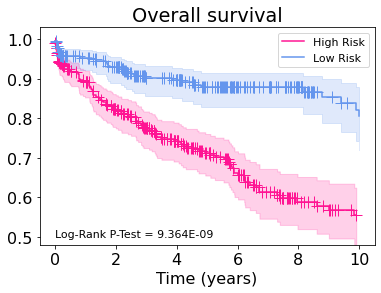

In [248]:
kmf_os_h.plot(
  show_censors=True,
  loc=slice(0., 10.),
  ci_alpha=0.2,
  c='deeppink')
kmf_os_l.plot(
  show_censors=True,
  loc=slice(0., 10.),
  ci_alpha=0.2,
  c='cornflowerblue')

plt.title('Overall survival')
plt.xlabel('Time (years)')
plt.ylabel('')
plt.ylim(0.48, 1.03)
plt.text(0, 0.5, f'Log-Rank P-Test = {format(results_os.p_value, ".3E")}',
fontdict={'size': 11})
plt.legend(fontsize=11)
plt.savefig(f'{MAIN_DIR}/os_final.png', bbox_inches = "tight")

##### Distant metastasis

In [249]:
df_dmfs = df_2_unknown[df_2_unknown['t.dmfs'].notnull()].sort_values(by='t.dmfs')
df_dmfs = df_dmfs[df_dmfs['e.dmfs'].notnull()]

In [250]:
kmf_dmfs_h = KaplanMeierFitter()
kmf_dmfs_l = KaplanMeierFitter()

High_dmfs = df_dmfs.query('prediction == 1')
Low_dmfs = df_dmfs.query('prediction == 0')

In [251]:
kmf_dmfs_h.fit(High_dmfs['t.dmfs'], High_dmfs['e.dmfs'], label = 'High Risk')
kmf_dmfs_l.fit(Low_dmfs['t.dmfs'], Low_dmfs['e.dmfs'], label = 'Low Risk')

<lifelines.KaplanMeierFitter:"Low Risk", fitted with 130 total observations, 107 right-censored observations>

In [252]:
from lifelines.statistics import logrank_test
results_dmfs = logrank_test(
  High_dmfs['t.dmfs'],
  Low_dmfs['t.dmfs'],
  High_dmfs['e.dmfs'],
  Low_dmfs['e.dmfs'])
results_dmfs.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.42 0.01      7.28

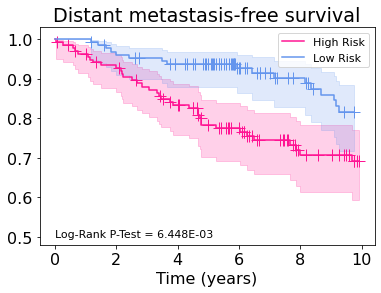

In [253]:
kmf_dmfs_h.plot(
  show_censors=True,
  loc=slice(0., 10.),
  ci_alpha=0.2,
  c='deeppink')
kmf_dmfs_l.plot(
  show_censors=True,
  loc=slice(0., 10.),
  ci_alpha=0.2,
  c='cornflowerblue')

plt.title('Distant metastasis-free survival')
plt.xlabel('Time (years)')
plt.ylabel('')
plt.ylim(0.48, 1.03)
plt.text(0, 0.5, f'Log-Rank P-Test = {format(results_dmfs.p_value, ".3E")}',
fontdict={'size': 11})
plt.legend(fontsize=11)
plt.savefig(f'{MAIN_DIR}/dmfs_final.png', bbox_inches = "tight")

##### Relapse-free survival

In [266]:
df_rfs = df_2_unknown[df_2_unknown['relapse_event_time_yrs'].notnull()].sort_values(by='relapse_event_time_yrs')
df_rfs = df_rfs[df_rfs.relapse_event.notnull()]

In [267]:
kmf_rfs_h = KaplanMeierFitter()
kmf_rfs_l = KaplanMeierFitter()

High_rfs = df_rfs.query('prediction == 1')
Low_rfs = df_rfs.query('prediction == 0')

In [274]:
kmf_rfs_h.fit(High_rfs['relapse_event_time_yrs'], High_rfs['relapse_event'], label = 'High Risk')
kmf_rfs_l.fit(Low_rfs['relapse_event_time_yrs'], Low_rfs['relapse_event'], label = 'Low Risk')

<lifelines.KaplanMeierFitter:"Low Risk", fitted with 130 total observations, 90 right-censored observations>

In [275]:
from lifelines.statistics import logrank_test
results_rfs = logrank_test(
  High_rfs['relapse_event_time_yrs'],
  Low_rfs['relapse_event_time_yrs'],
  High_rfs['relapse_event'],
  Low_rfs['relapse_event'])
results_rfs.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.30 0.04      4.71

In [276]:
print('P-values: ')
print(f'os: {results_os.p_value}')
print(f'dmfs: {results_dmfs.p_value}')
print(f'rfs: {results_rfs.p_value}')

P-values: 
os: 9.364373141353523e-09
dmfs: 0.0064477499997564955
rfs: 0.038137160713982356


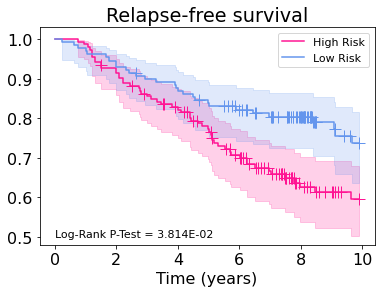

In [277]:
kmf_rfs_h.plot(
  show_censors=True,
  loc=slice(0., 10.),
  ci_alpha=0.2,
  c='deeppink')
kmf_rfs_l.plot(
  show_censors=True,
  loc=slice(0., 10.),
  ci_alpha=0.2,
  c='cornflowerblue')

plt.title('Relapse-free survival')
plt.xlabel('Time (years)')
plt.ylabel('')
plt.ylim(0.48, 1.03)
plt.text(0, 0.5, f'Log-Rank P-Test = {format(results_rfs.p_value, ".3E")}',
fontdict={'size': 11})
plt.legend(fontsize=11)
plt.savefig(f'{MAIN_DIR}/rfs_final.png', bbox_inches = "tight")

# Feature Importance

In [ ]:
df_test_results = pd.DataFrame(test_results)

### Retrieve importance measures for model
#### (Copied from provided code)

In [ ]:
all_top_features_weight = collections.defaultdict(int)
for run in df_test_results['top_features_weight']:
    for gene, metric in run.items():
        all_top_features_weight[gene] += metric
sorted_features_lst_weight = sorted(all_top_features_weight.items(), key=lambda kv: kv[1], reverse=True)

df_weight = pd.DataFrame(sorted_features_lst_weight)
df_weight.columns = ['gene', 'weight']
df_weight.set_index('gene', inplace=True)

In [ ]:
df_test_results

,accuracy,ROC,precision,recall,f1_score,matthews_corrcoef,confusion_matrix,fpr,tpr,roc_auc,selected_features,model,top_features_weight,top_features_gain,top_features_cover
0,0.903553,0.862881,0.856952,0.862881,0.859860,0.719809,"[[34, 9], [10, 144]]","[0.0, 0.20930232558139536, 1.0]","[0.0, 0.935064935064935, 1.0]",0.862881,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'RFC2': 1.0, 'PTPN21': 1.0, 'PRPF8': 1.0, 'RP...","{'RFC2': 2.6123294830322266, 'PTPN21': 5.59523...","{'RFC2': 7.25, 'PTPN21': 6.0, 'PRPF8': 8.30546..."
1,0.852792,0.791889,0.787281,0.791889,0.789538,0.579152,"[[30, 14], [15, 138]]","[0.0, 0.3181818181818182, 1.0]","[0.0, 0.9019607843137255, 1.0]",0.791889,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'DDR1': 1.0, 'CYP2A6': 1.0, 'PRPF8': 1.0, 'AR...","{'DDR1': 1.520724892616272, 'CYP2A6': 2.921884...","{'DDR1': 2.075822114944458, 'CYP2A6': 9.75, 'P..."
2,0.908629,0.843418,0.871030,0.843418,0.856134,0.713914,"[[30, 11], [7, 149]]","[0.0, 0.2682926829268293, 1.0]","[0.0, 0.9551282051282052, 1.0]",0.843418,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'HSPA6': 1.0, 'PAX8': 1.0, 'CYP2A6': 1.0, 'RP...","{'HSPA6': 1.623734951019287, 'PAX8': 6.0616226...","{'HSPA6': 2.089606523513794, 'PAX8': 74.235717..."
3,0.893401,0.869997,0.845152,0.869997,0.856399,0.714717,"[[38, 8], [13, 138]]","[0.0, 0.17391304347826086, 1.0]","[0.0, 0.9139072847682119, 1.0]",0.869997,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'UBA7': 1.0, 'PRPF8': 1.0, 'PSMB2': 1.0, 'RTC...","{'UBA7': 1.9797983169555664, 'PRPF8': 3.376304...","{'UBA7': 4.5, 'PRPF8': 7.935649871826172, 'PSM..."
4,0.868020,0.823428,0.823428,0.823428,0.823428,0.646856,"[[36, 13], [13, 135]]","[0.0, 0.2653061224489796, 1.0]","[0.0, 0.9121621621621622, 1.0]",0.823428,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'RFC2': 1.0, 'CAPNS1': 1.0, 'ARF1': 1.0, 'APP...","{'RFC2': 1.028571367263794, 'CAPNS1': 1.028403...","{'RFC2': 2.5, 'CAPNS1': 6.053215026855469, 'AR..."
5,0.847716,0.809963,0.785544,0.809963,0.796263,0.595005,"[[34, 12], [18, 133]]","[0.0, 0.2608695652173913, 1.0]","[0.0, 0.8807947019867549, 1.0]",0.809963,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'HSPA6': 1.0, 'EPHB3': 1.0, 'SPAG7': 1.0, 'C1...","{'HSPA6': 1.5873017311096191, 'EPHB3': 2.95714...","{'HSPA6': 3.5, 'EPHB3': 2.5, 'SPAG7': 20.02052..."
6,0.878173,0.819371,0.829885,0.819371,0.824421,0.649171,"[[32, 13], [11, 141]]","[0.0, 0.28888888888888886, 1.0]","[0.0, 0.9276315789473685, 1.0]",0.819371,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'RFC2': 1.0, 'HSPA6': 1.0, 'PAX8': 1.0, 'TRAD...","{'RFC2': 2.1666667461395264, 'HSPA6': 1.187878...","{'RFC2': 2.0, 'HSPA6': 2.75, 'PAX8': 4.0, 'TRA..."
7,0.862944,0.790330,0.805582,0.790330,0.797487,0.595716,"[[29, 15], [12, 141]]","[0.0, 0.3409090909090909, 1.0]","[0.0, 0.9215686274509803, 1.0]",0.790330,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'CCL5': 1.0, 'RPL34': 1.0, 'ARF1': 1.0, 'KARS...","{'CCL5': 3.0494346618652344, 'RPL34': 1.022886...","{'CCL5': 11.25, 'RPL34': 2.3396799564361572, '..."
8,0.934010,0.884076,0.907432,0.884076,0.895080,0.791164,"[[32, 8], [5, 152]]","[0.0, 0.2, 1.0]","[0.0, 0.9681528662420382, 1.0]",0.884076,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'THRA': 1.0, 'MMP14': 1.0, 'BAD': 1.0, 'DDX5'...","{'THRA': 2.1666667461395264, 'MMP14': 0.523250...","{'THRA': 2.0, 'MMP14': 16.5192928314209, 'BAD'..."
9,0.862944,0.790330,0.805582,0.790330,0.797487,0.595716,"[[29, 15], [12, 141]]","[0.0, 0.3409090909090909, 1.0]","[0.0, 0.9215686274509803, 1.0]",0.790330,[],"XGBClassifier(base_score=0.5, booster='gbtree'...","{'UBA7': 2.0, 'BAD': 1.0, 'PRPF8': 1.0, 'CAPNS...","{'UBA7': 3.7916667461395264, 'BAD': 3.28787899...","{'UBA7': 2.5, 'BAD': 2.75, 'PRPF8': 12.2679271..."


In [ ]:
all_top_features_gain = collections.defaultdict(int)
for run in df_test_results['top_features_gain']:
    for gene, metric in run.items():
        all_top_features_gain[gene] += metric
sorted_features_lst_gain = sorted(all_top_features_gain.items(), key=lambda kv: kv[1], reverse=True)

df_gain = pd.DataFrame(sorted_features_lst_gain)
df_gain.columns = ['gene', 'gain']
df_gain.set_index('gene', inplace=True)

In [ ]:
all_top_features_cover = collections.defaultdict(int)
for run in df_test_results['top_features_cover']:
    for gene, metric in run.items():
        all_top_features_cover[gene] += metric      
sorted_features_lst_cover = sorted(all_top_features_cover.items(), key=lambda kv: kv[1], reverse=True)

df_cover = pd.DataFrame(sorted_features_lst_gain)
df_cover.columns = ['gene', 'cover']
df_cover.set_index('gene', inplace=True)

In [ ]:
df_total = pd.merge(df_weight, df_gain, left_index=True, right_index=True)
df_total = pd.merge(df_total, df_cover, left_index=True, right_index=True)
df_total.head()

,weight,gain,cover
gene,,,
LINC00472,50.0,363.665582,363.665582
SLC7A5,39.0,1332.290777,1332.290777
BIRC5,34.0,4017.677082,4017.677082
AURKA,34.0,5116.027956,5116.027956
NAT1,33.0,294.629472,294.629472


### Sort top genes by gain and save for gene selection
#### (HW)

In [ ]:
all_genes = df_total.sort_values(by='gain', ascending=False)
all_genes_list = list(all_genes.index.values)
all_genes_list

['AURKA',
 'BIRC5',
 'CDC20',
 'CCNB2',
 'MELK',
 'PTTG1',
 'CENPA',
 'SLC7A5',
 'CENPN',
 'TRIP13',
 'KIF2C',
 'IL6ST',
 'STC2',
 'UBE2C',
 'OSBPL1A',
 'PTPRT',
 'LINC00472',
 'STK32B',
 'SLC25A12',
 'EXO1',
 'RRM2',
 'NAT1',
 'PCSK6',
 'MKI67',
 'ESD',
 'WDR19',
 'TPX2',
 'E2F8',
 'ERBB4',
 'BBOF1',
 'IFT88',
 'HJURP',
 'CACNA1D',
 'TUBA4A',
 'SCUBE2',
 'DNAJC12',
 'ADRA2A',
 'GCH1',
 'NME5',
 'BMERB1',
 'ACADSB',
 'MYBL2',
 'TMC5',
 'RAI2',
 'NUDT6',
 'MCM10',
 'CLMN',
 'TMEM132A',
 'MAB21L4',
 'LRP8',
 'KIF13B',
 'DBNDD1',
 'HSPB1',
 'HTATIP2',
 'MRPS30',
 'GLRB',
 'BBS1',
 'UBE2S',
 'PDZRN3',
 'MARS1',
 'PSD3',
 'PDGFC',
 'ORC6',
 'CILP',
 'CHAD',
 'OR7E47P',
 'SLC52A2',
 'YBX1',
 'PIR',
 'NUTF2',
 'TBC1D9',
 'NAV2',
 'NLGN4X',
 'AURKB',
 'RUFY3',
 'PPL',
 'KCNE4',
 'TPD52L2',
 'C1orf21',
 'DYNC2H1',
 'GHRH',
 'CX3CR1',
 'ZNF131',
 'DRC3',
 'KYAT3',
 'BCL2L11',
 'SLC7A6',
 'ICOS',
 'TNFRSF11B',
 'FGFR3',
 'SF1',
 'GTSE1',
 'SOCS5',
 'ESRP2',
 'ZC3H14',
 'FBXL6',
 'ADRM1',
 'FRZB',

In [ ]:
with open(f'{MAIN_DIR}/all_genes.pkl', 'wb') as fp:
    pickle.dump(all_genes_list, fp)

### SHAP visualization
#### (Copied from provided code)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


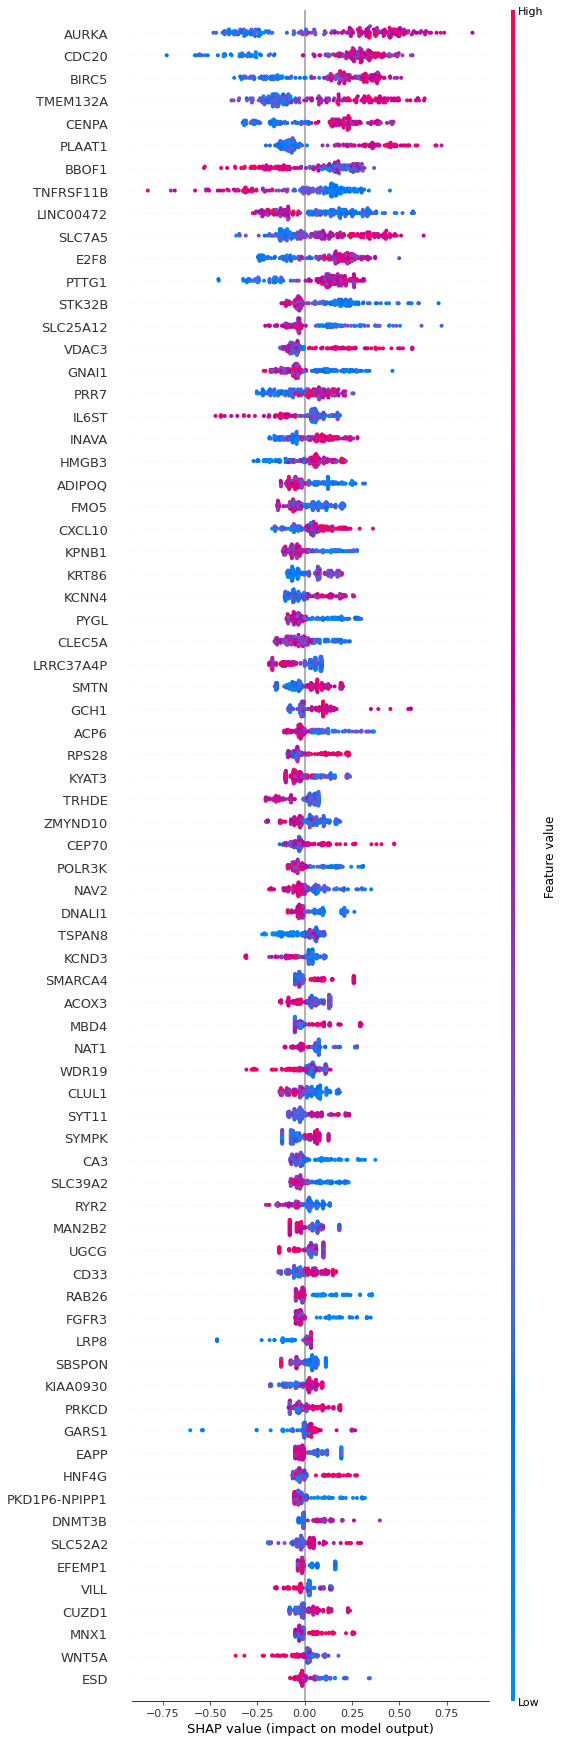

In [ ]:
shap.initjs()

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(test_df)
shap.summary_plot(shap_values, test_df, max_display=74, show=False)